In [1]:
from azureml import Workspace
%matplotlib inline

ws = Workspace()
experiment = ws.experiments['0407d4b081b8482e8539c3ab7990ebaf.f-id.91a5ce04322f49d3b98b44b2fec174c2']
ds = experiment.get_intermediate_dataset(
    node_id='33fa509f-d047-466b-a5af-5fbec898e206-8205',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
frame.dtypes

CustomerID                int64
Title                    object
FirstName                object
MiddleName               object
LastName                 object
Suffix                   object
AddressLine1             object
AddressLine2             object
City                     object
StateProvinceName        object
CountryRegionName        object
PostalCode               object
PhoneNumber              object
BirthDate                object
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag             int64
NumberCarsOwned           int64
NumberChildrenAtHome      int64
TotalChildren             int64
YearlyIncome              int64
LastUpdated              object
BikeBuyer                 int64
AvgMonthSpend           float64
age                       int64
dtype: object

In [24]:
import pandas as pd
def income(x):
    if x < 40000: return '20-40'
    elif 65000 > x > 40000: return '40-65'
    elif 90000 > x > 65000: return '65-90'
    elif 120000 > x > 90000: return '90-120'
    elif x > 120000: return '120+'
    else: return 'None'
    
frame['Income'] = frame['YearlyIncome'].map(income)

['TotalChildren',
 'NumberChildrenAtHome',
 'YearlyIncome',
 'age',
 'HomeOwnerFlag']

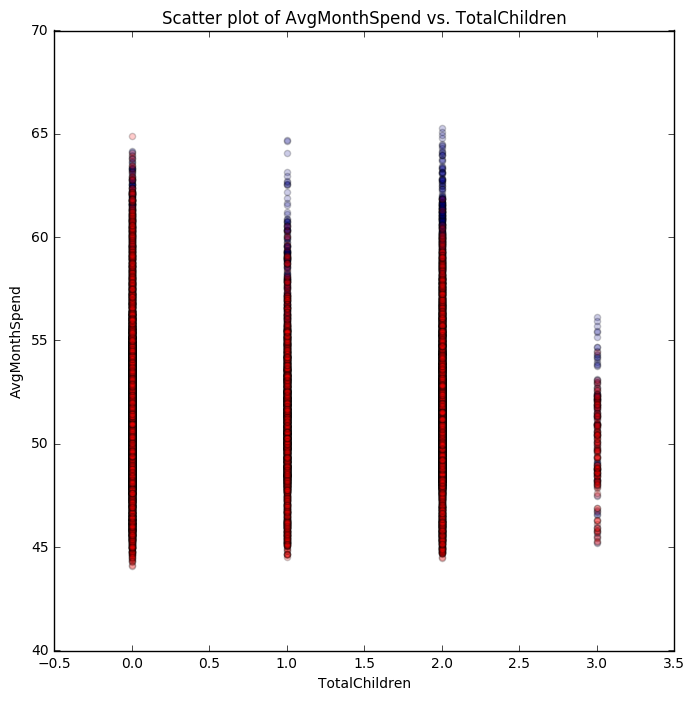

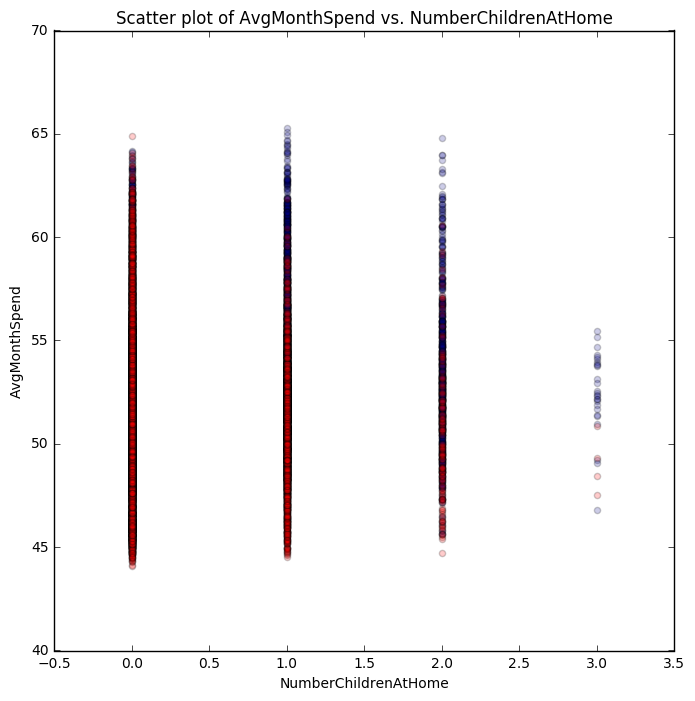

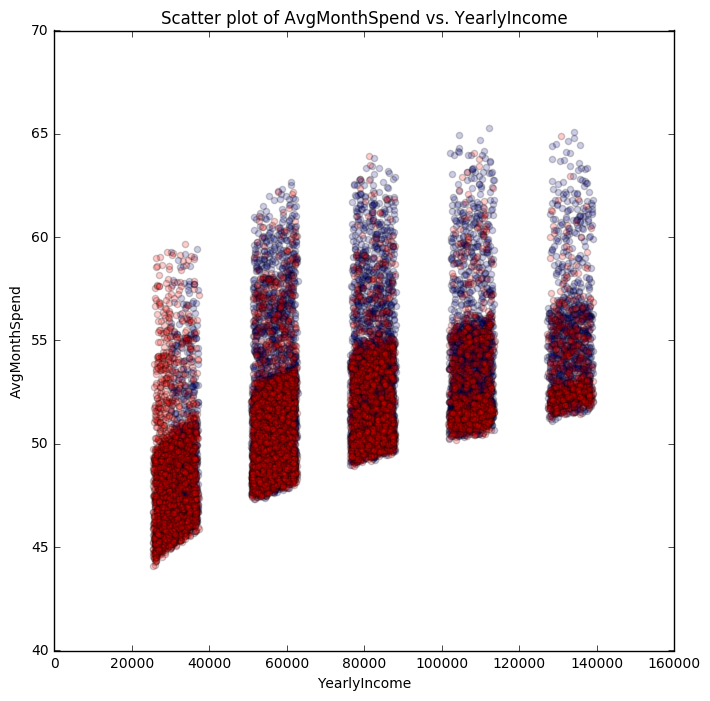

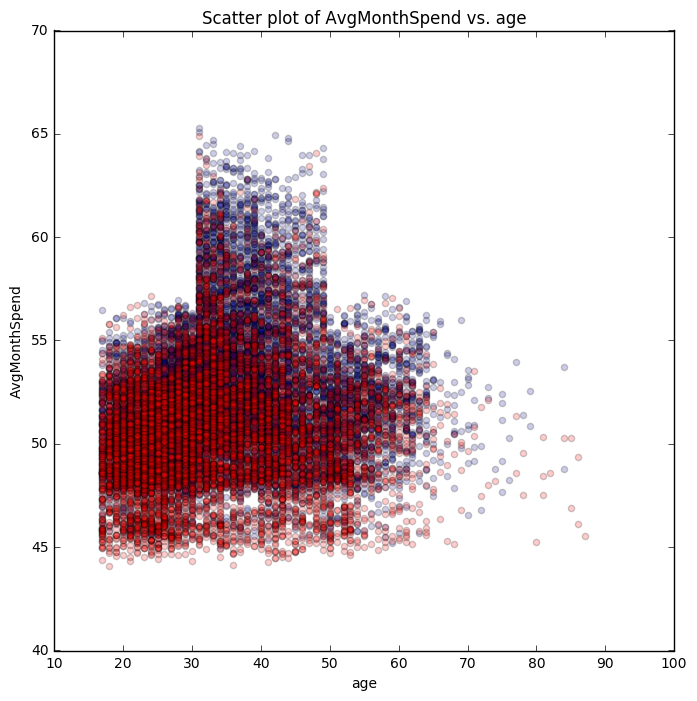

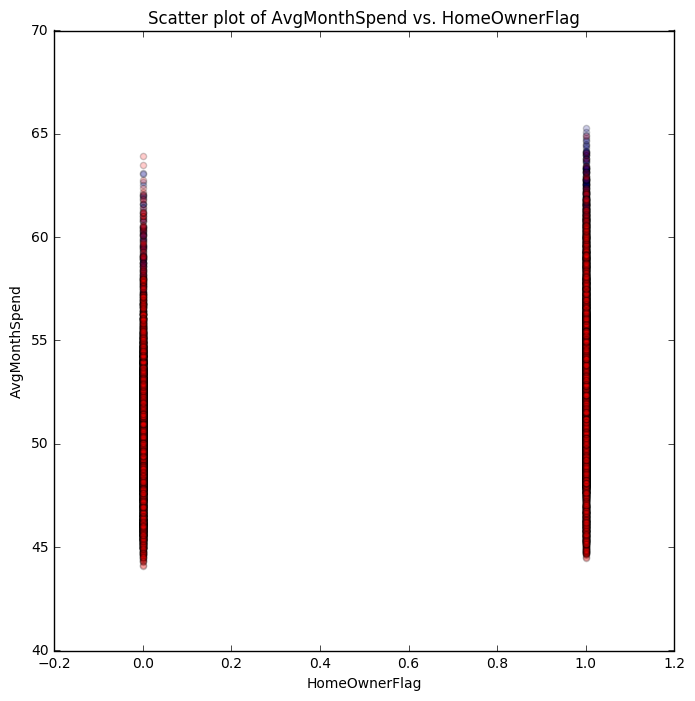

In [3]:
## Create scatter plot
def auto_scatter(df, plot_cols):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.gca()
        temp1 = df.ix[df['BikeBuyer'] == 1]       
        temp2 = df.ix[df['BikeBuyer'] == 0]
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'AvgMonthSpend' , 
                           ax = ax, color = 'DarkBlue', alpha = 0.20, legend=True)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'AvgMonthSpend' , 
                           ax = ax, color = 'Red', alpha = 0.20, legend=True) 
        ax.set_title('Scatter plot of AvgMonthSpend vs. ' + col)
    return plot_cols

## Define columns for making scatter plots
plot_cols3 = ["TotalChildren","NumberChildrenAtHome","YearlyIncome", "age", 'HomeOwnerFlag']

auto_scatter(frame, plot_cols3)

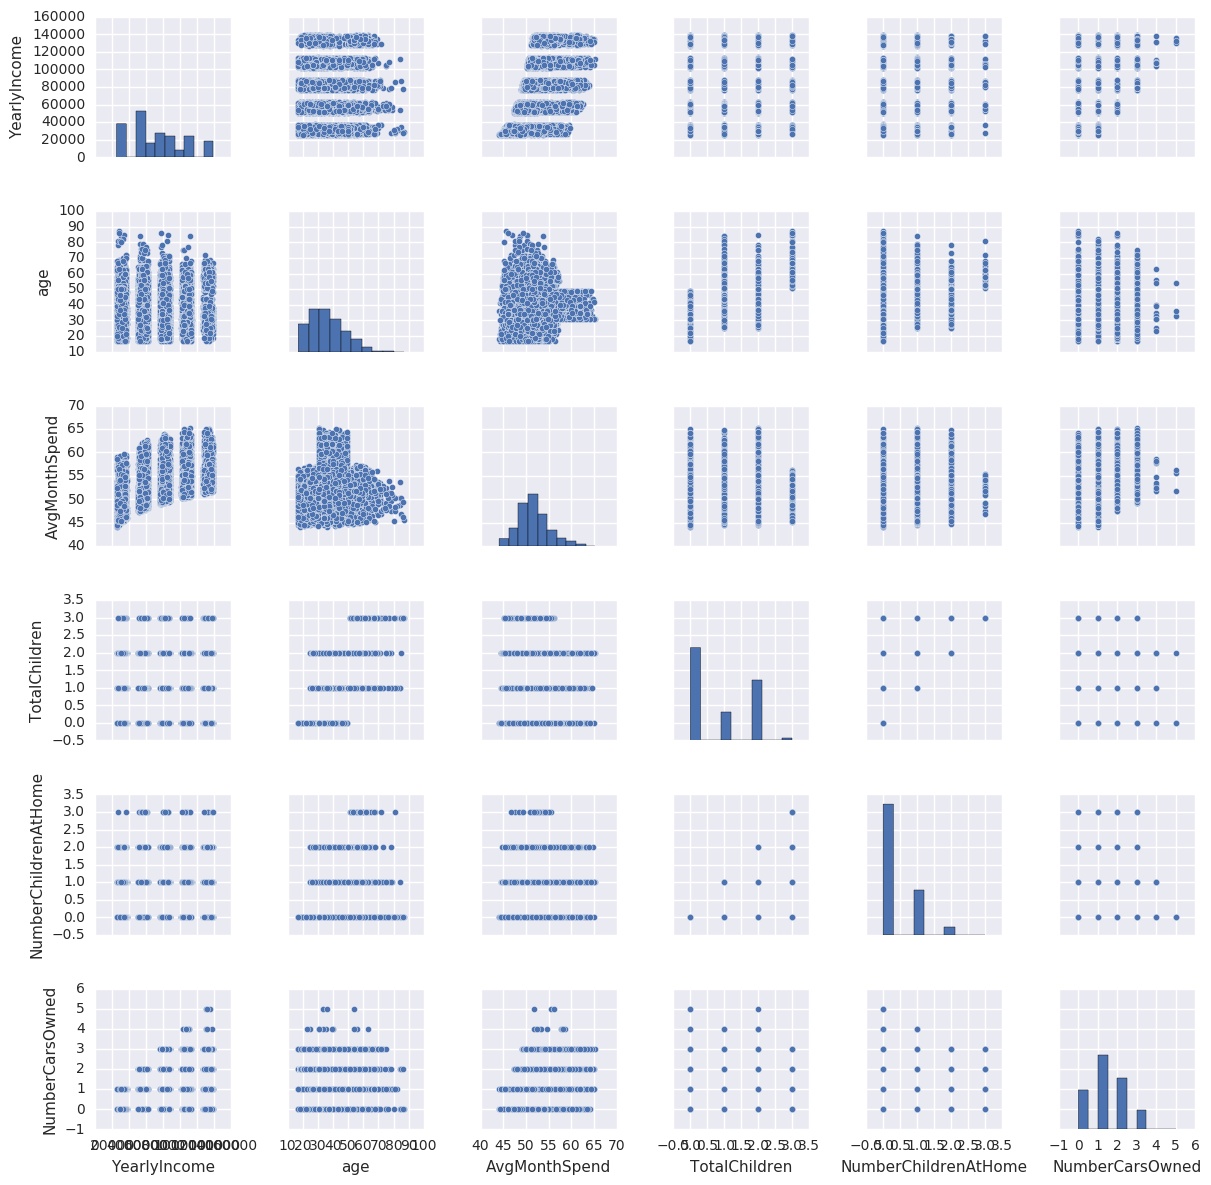

In [9]:
import seaborn as sns
num_cols = ["YearlyIncome", "age", 'AvgMonthSpend', "TotalChildren","NumberChildrenAtHome", "NumberCarsOwned"] 
sns.pairplot(frame[num_cols], size=2)

['YearlyIncome',
 'age',
 'AvgMonthSpend',
 'TotalChildren',
 'NumberChildrenAtHome',
 'NumberCarsOwned']

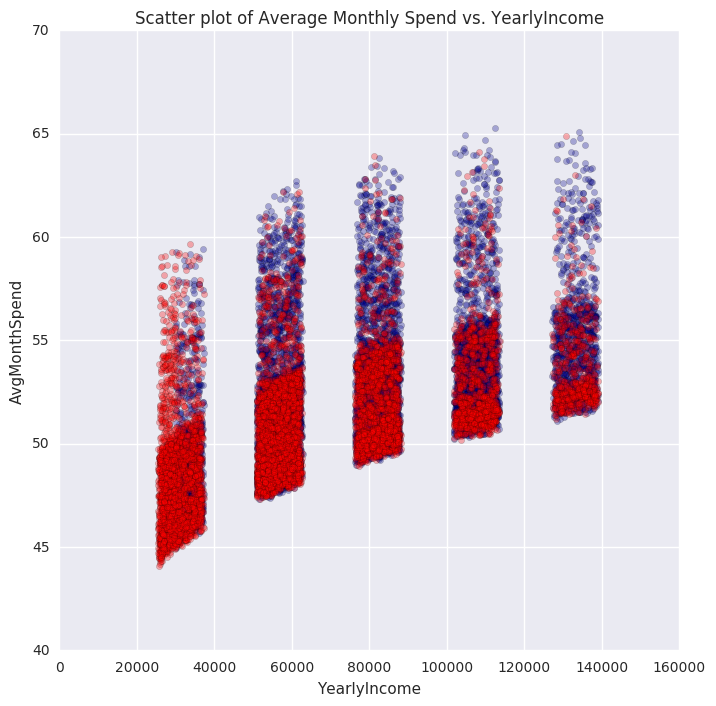

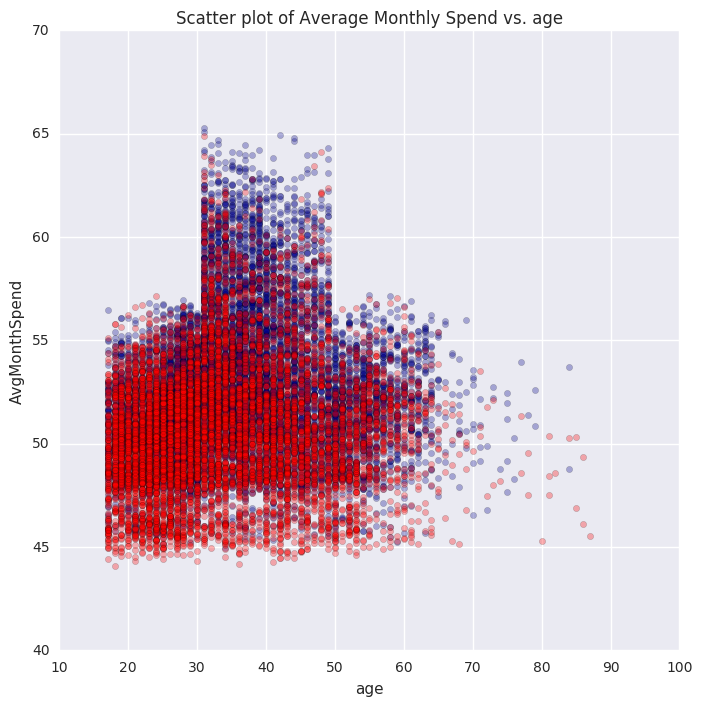

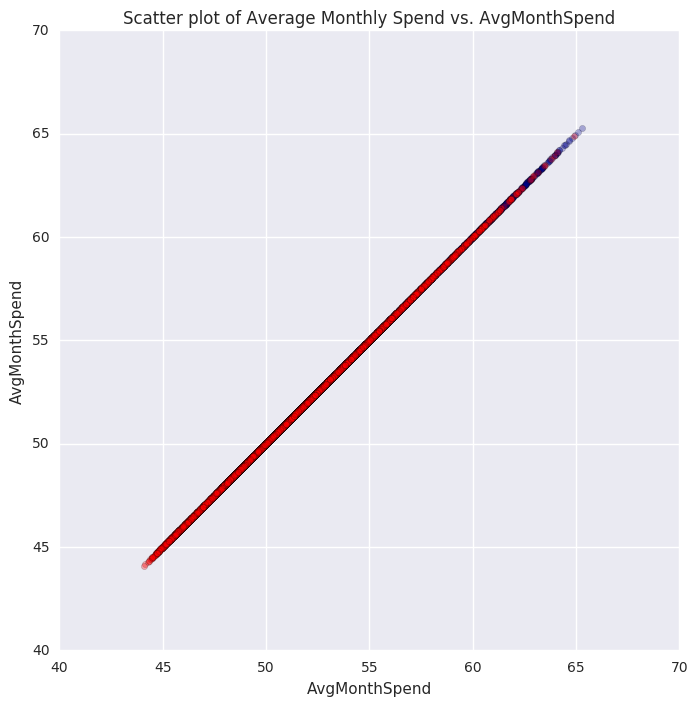

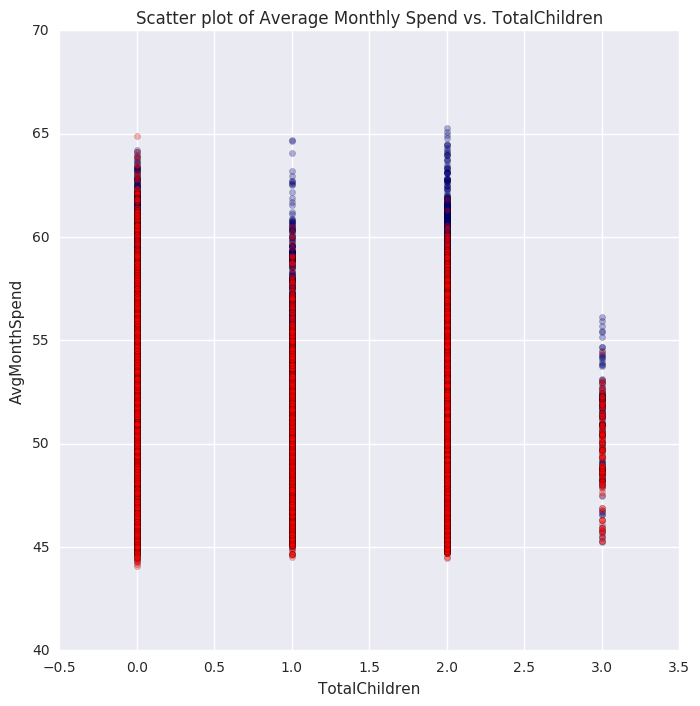

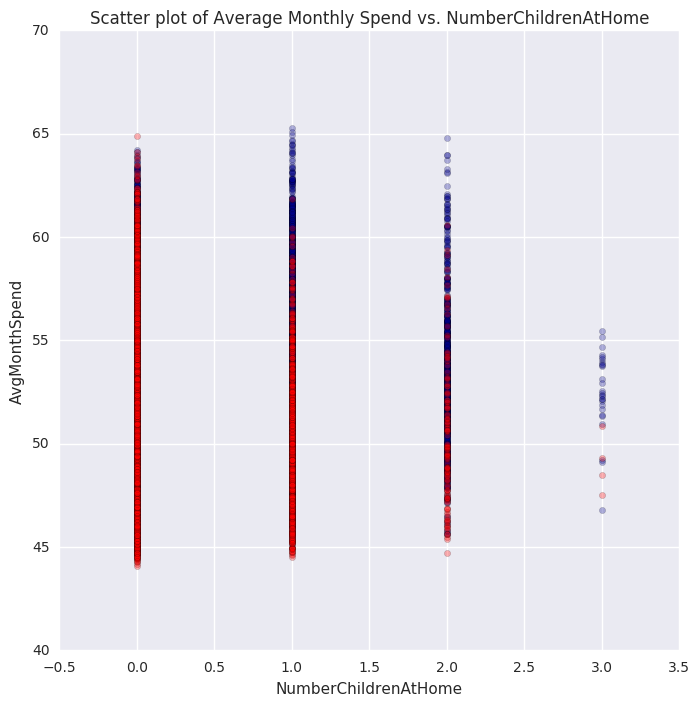

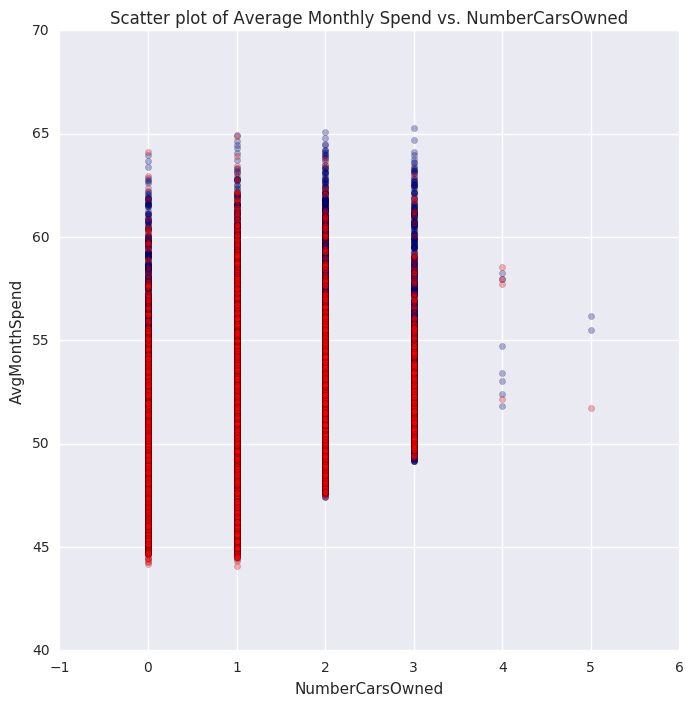

In [10]:
## Create scatter plot
def auto_scatter(df, plot_cols):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.gca()
        temp1 = df.ix[df['BikeBuyer'] == 1]       
        temp2 = df.ix[df['BikeBuyer'] == 0]
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'AvgMonthSpend' , 
                           ax = ax, color = 'darkblue',alpha = 0.30)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'AvgMonthSpend' , 
                           ax = ax, color = 'red', alpha = 0.3) 
        ax.set_title('Scatter plot of Average Monthly Spend vs. ' + col)
    return plot_cols

auto_scatter(frame, num_cols)

'Done'

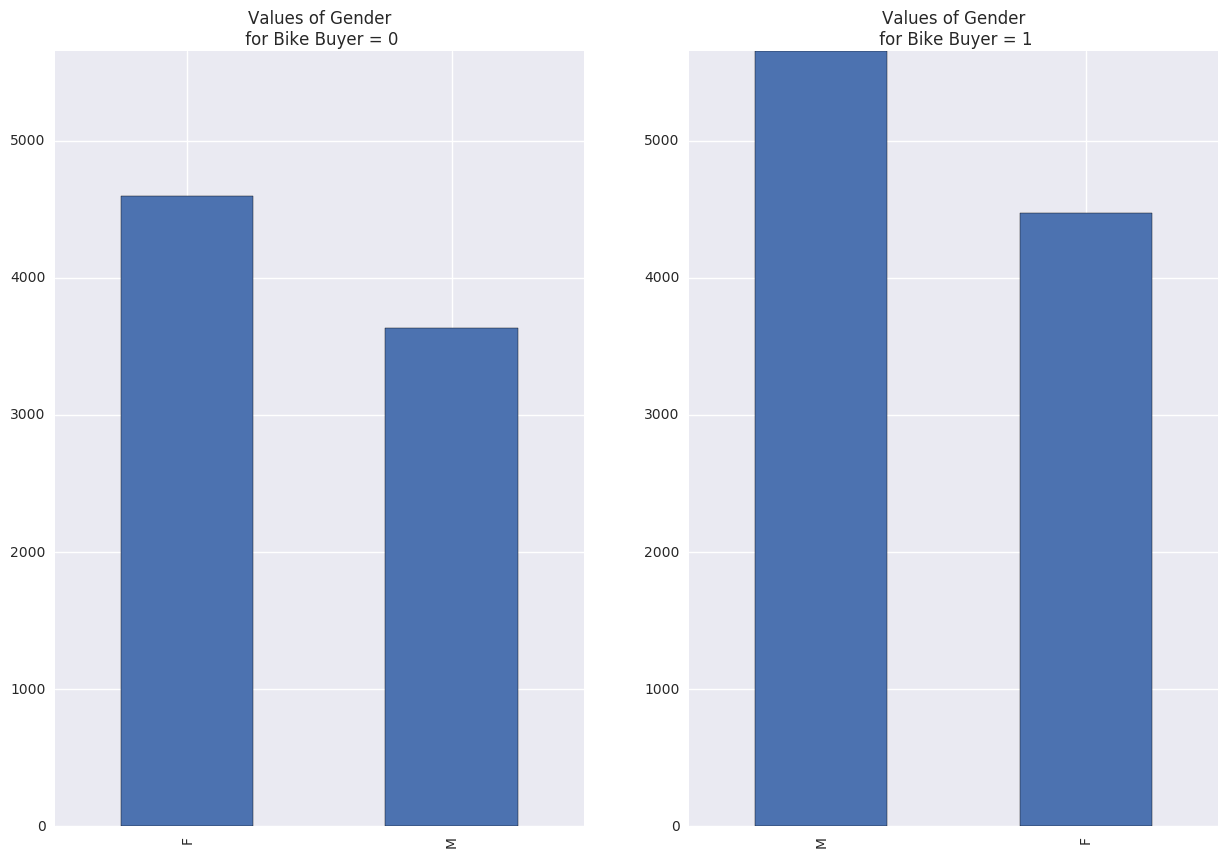

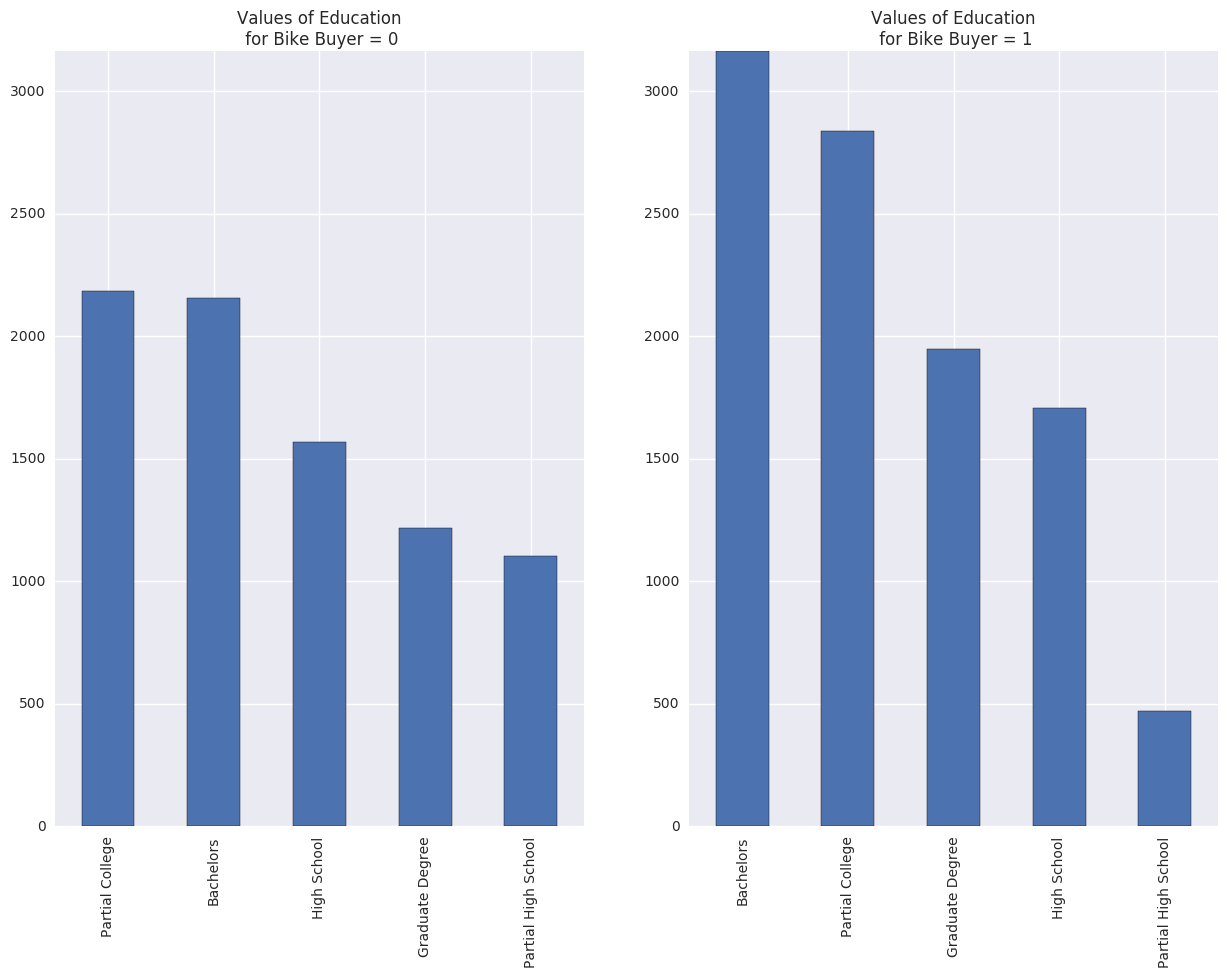

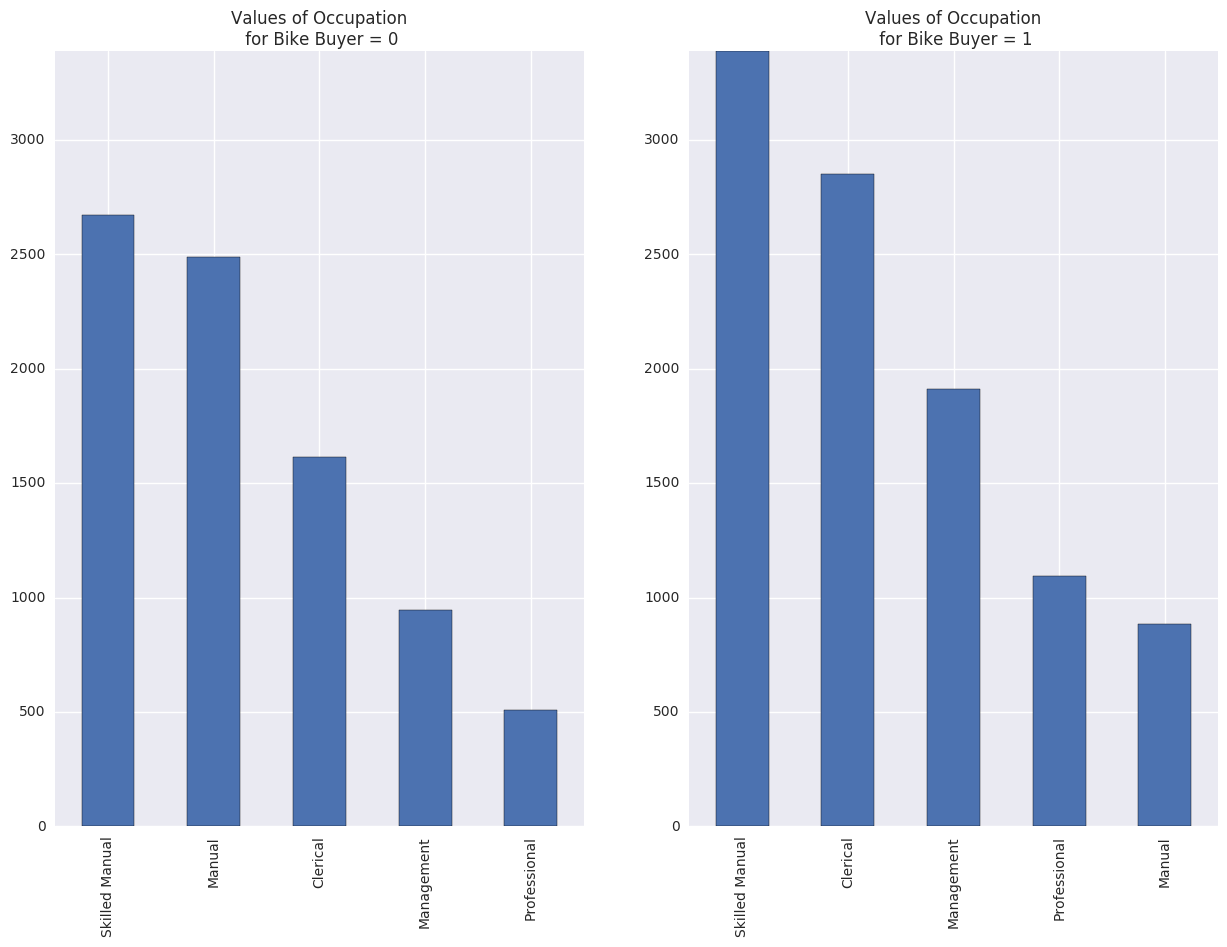

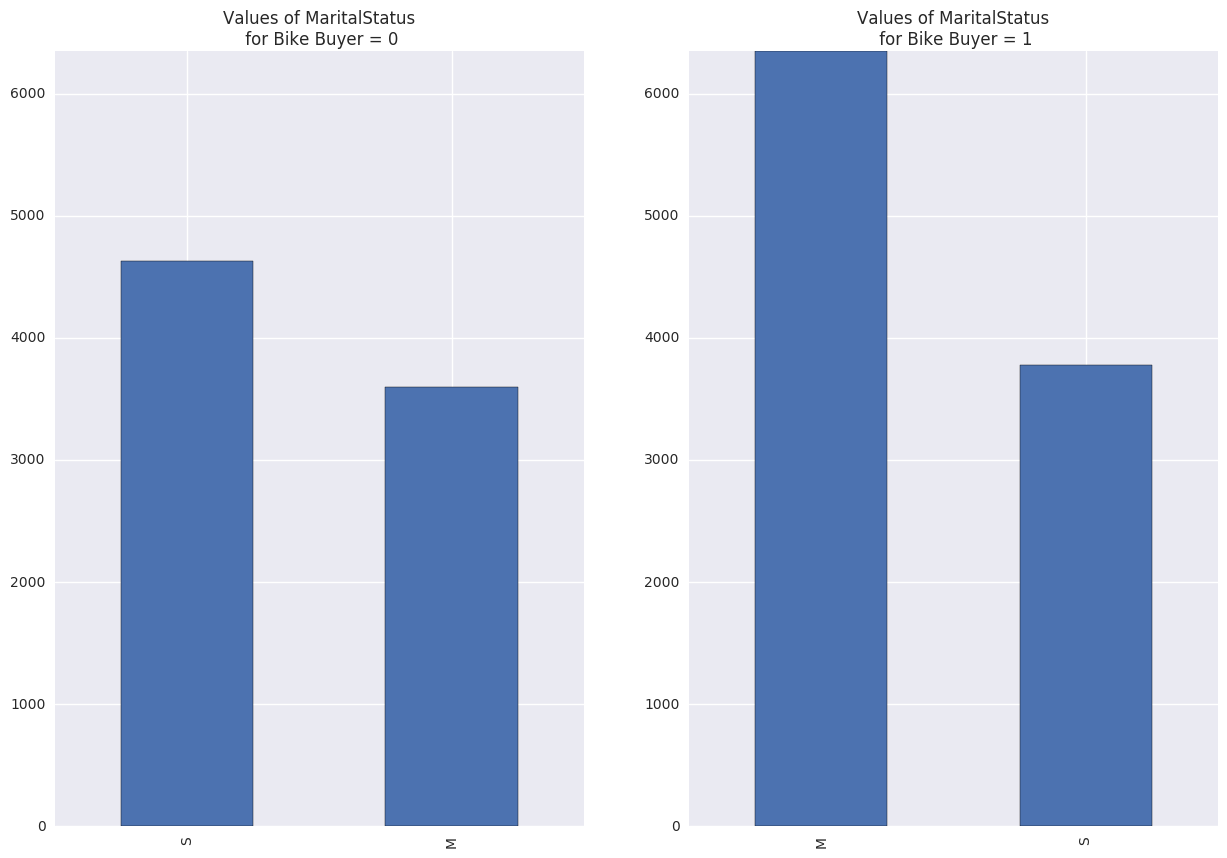

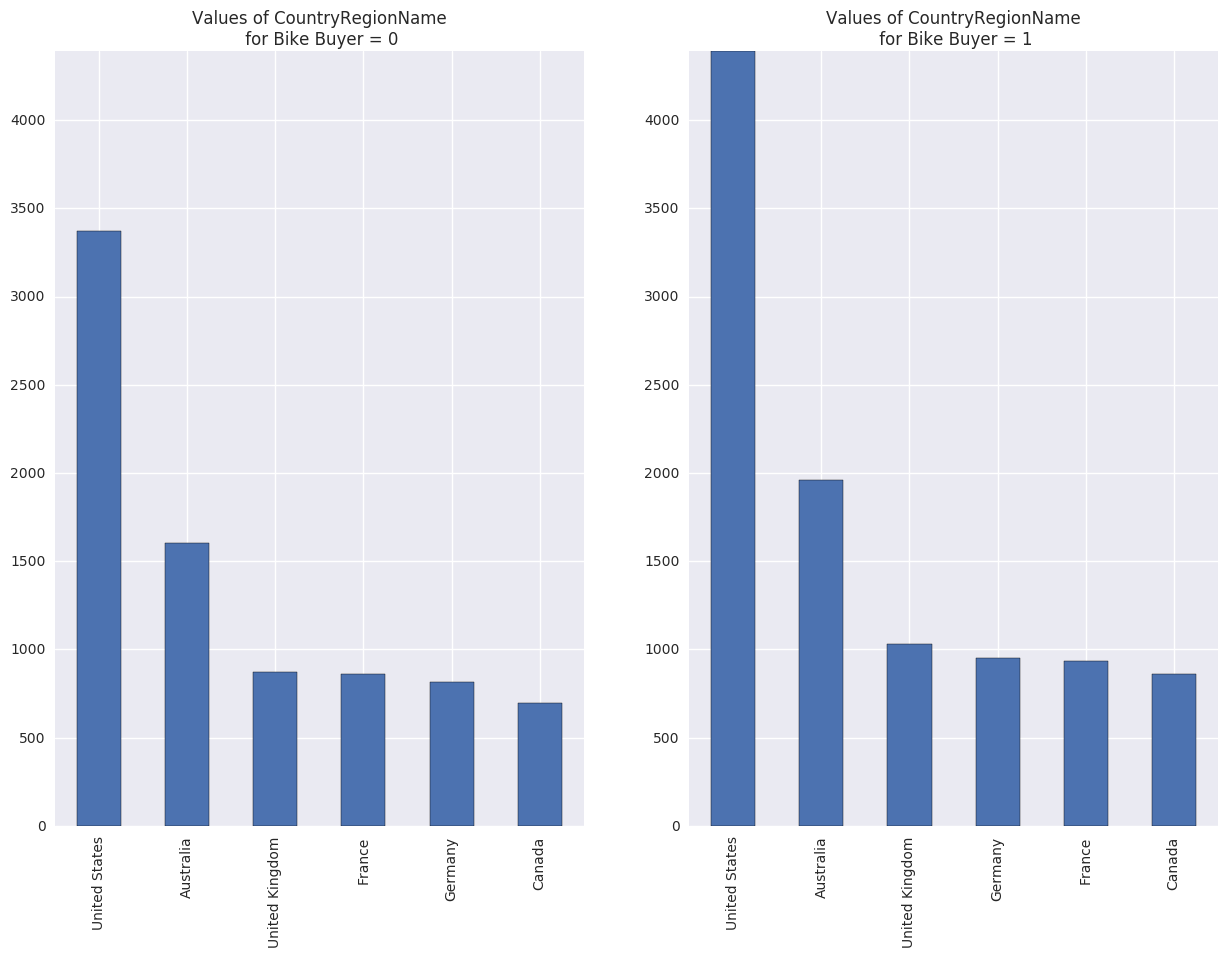

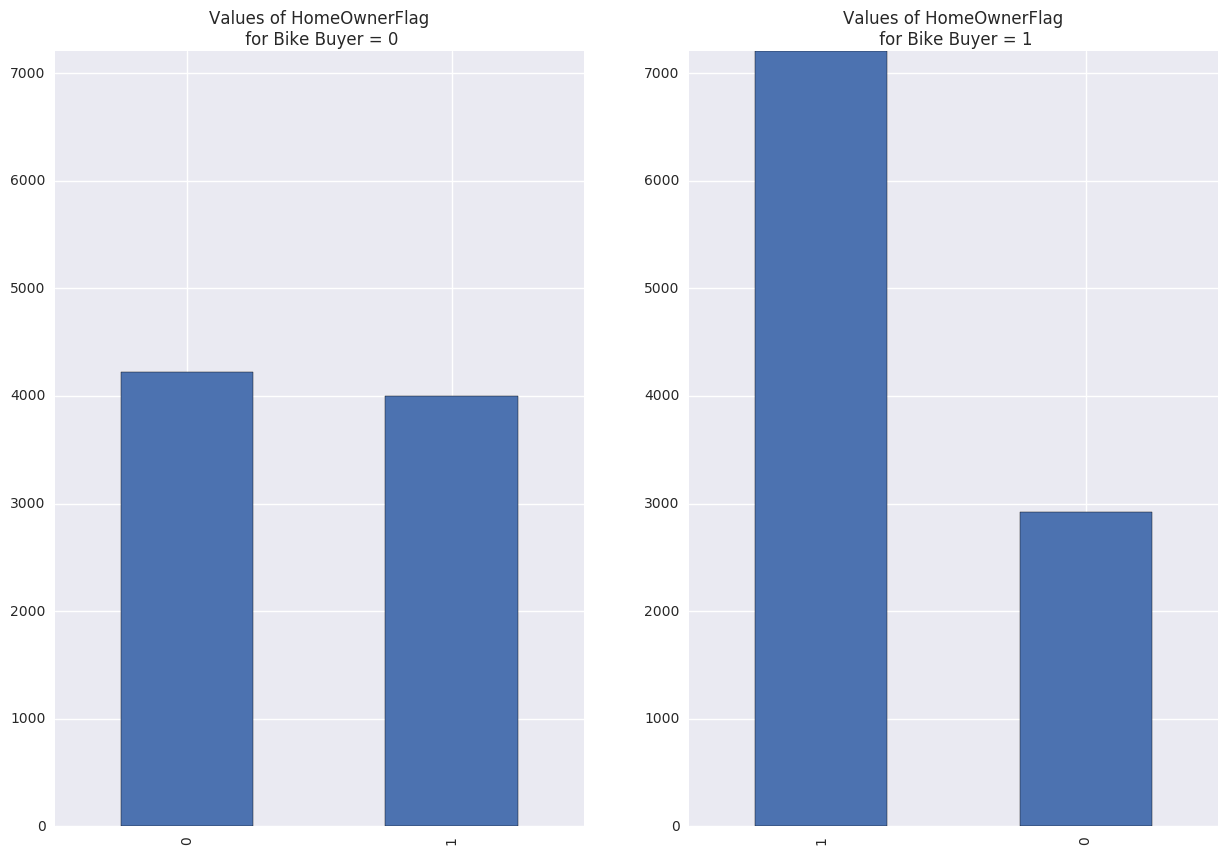

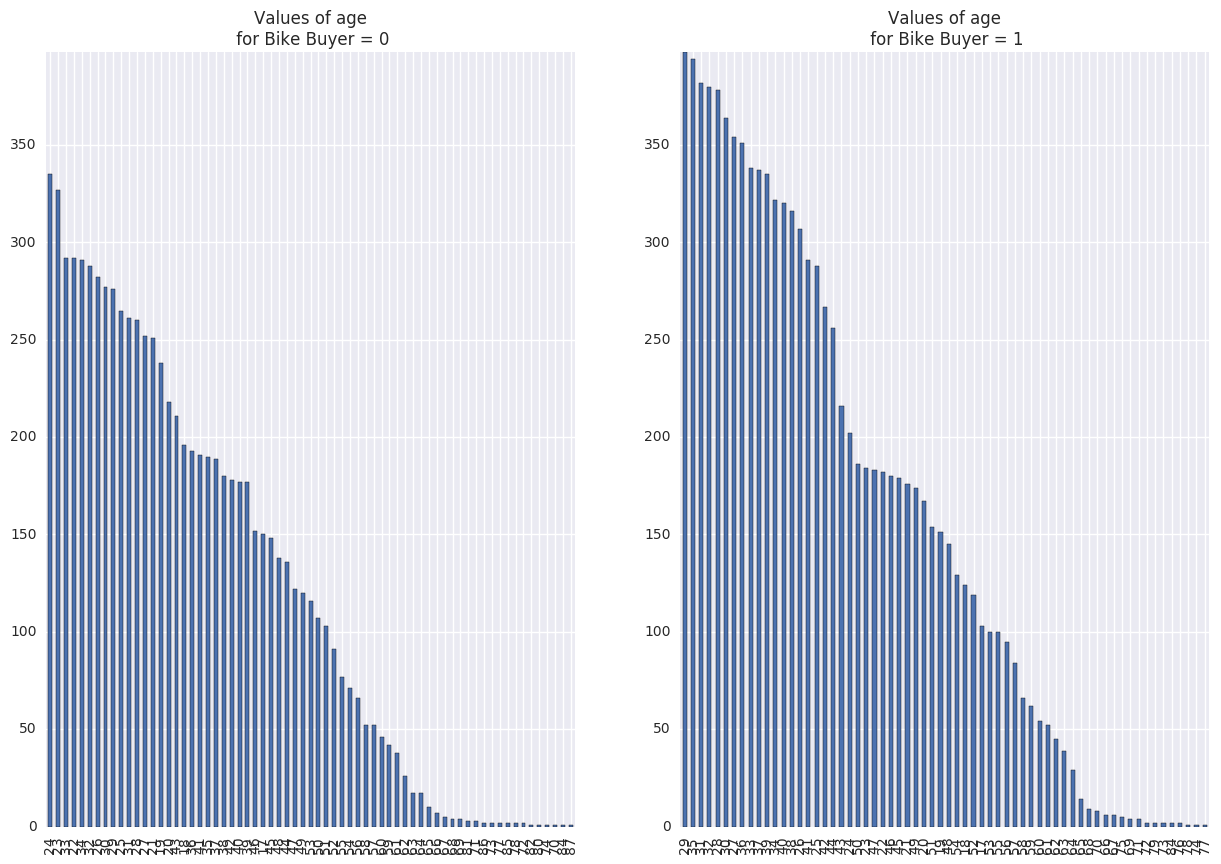

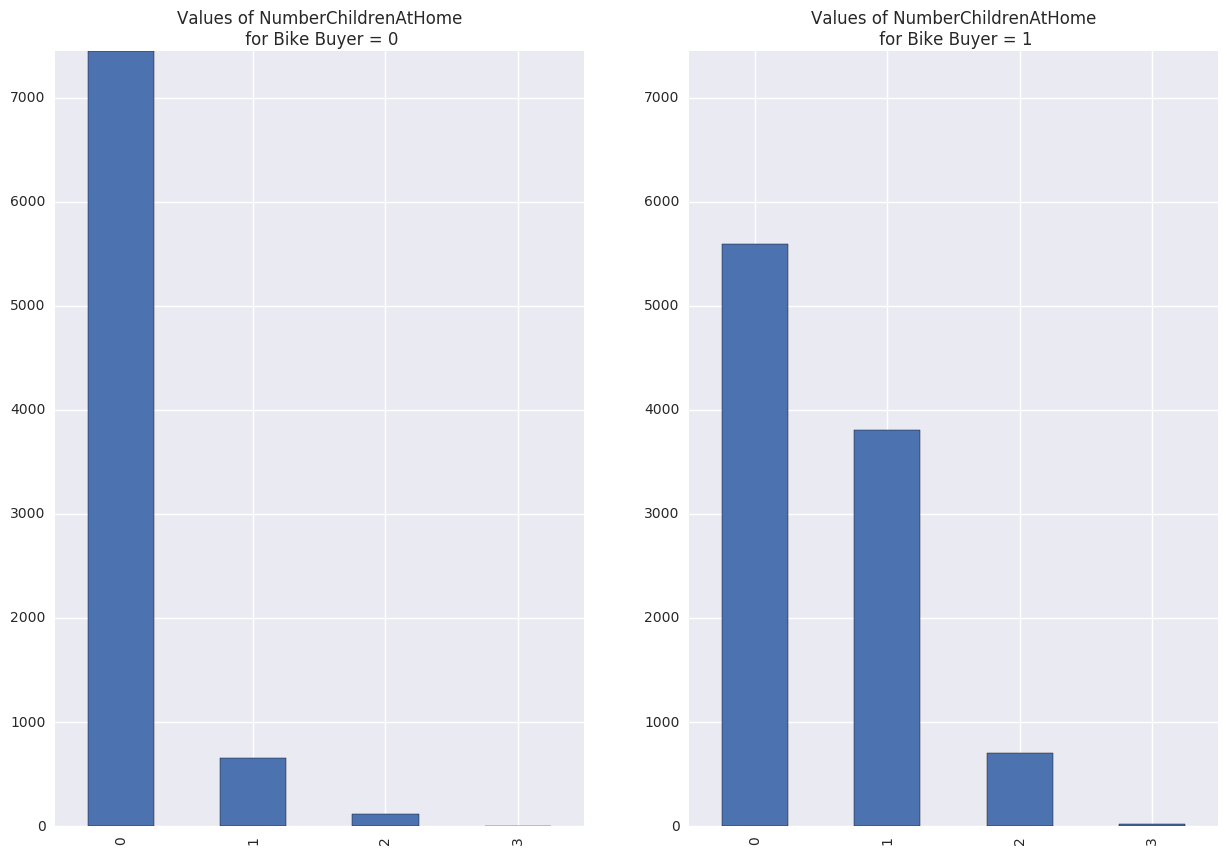

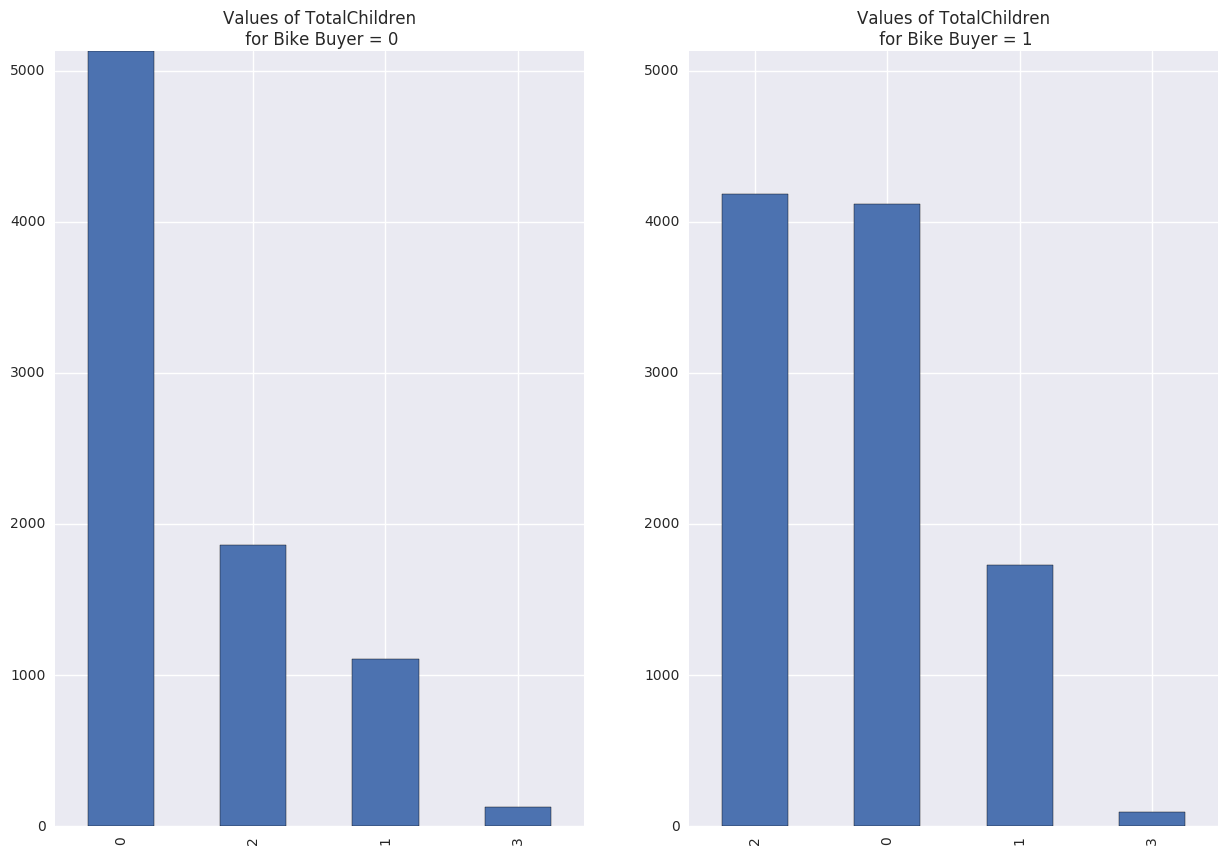

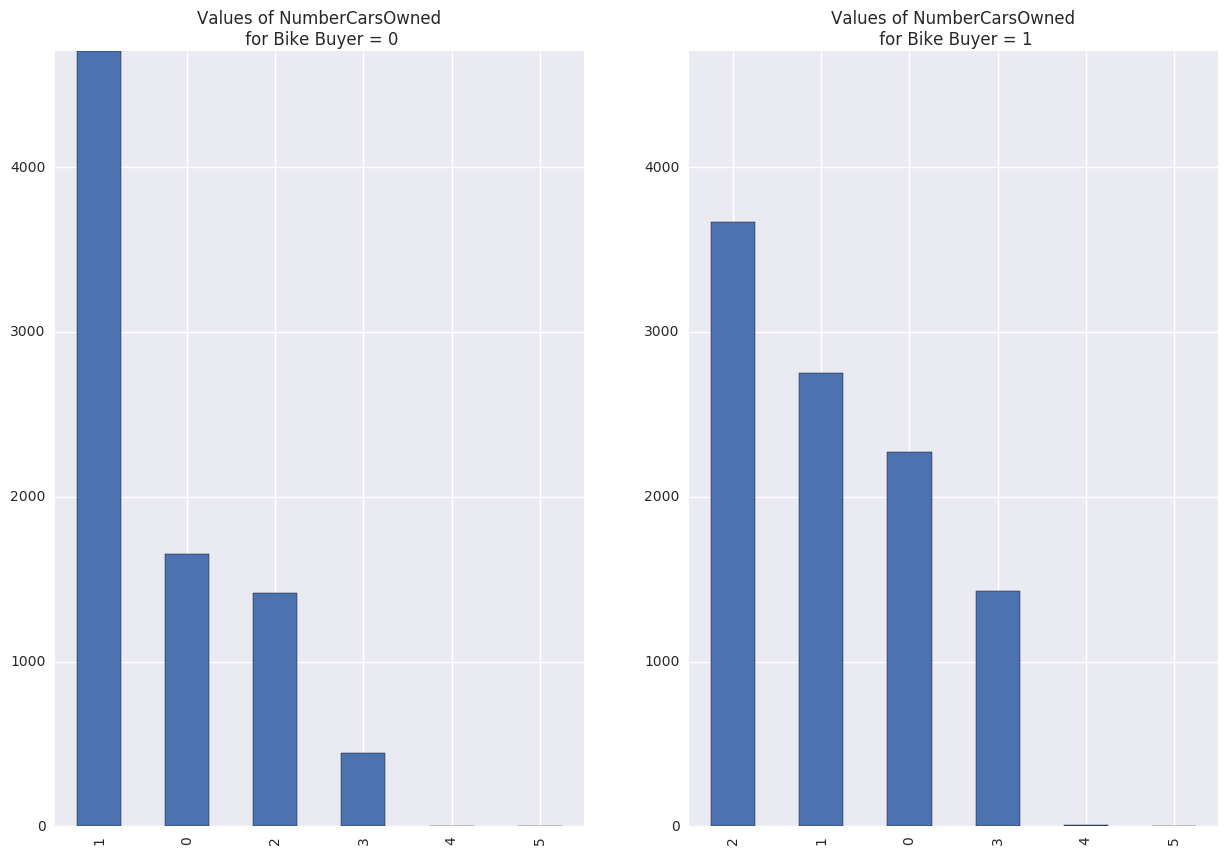

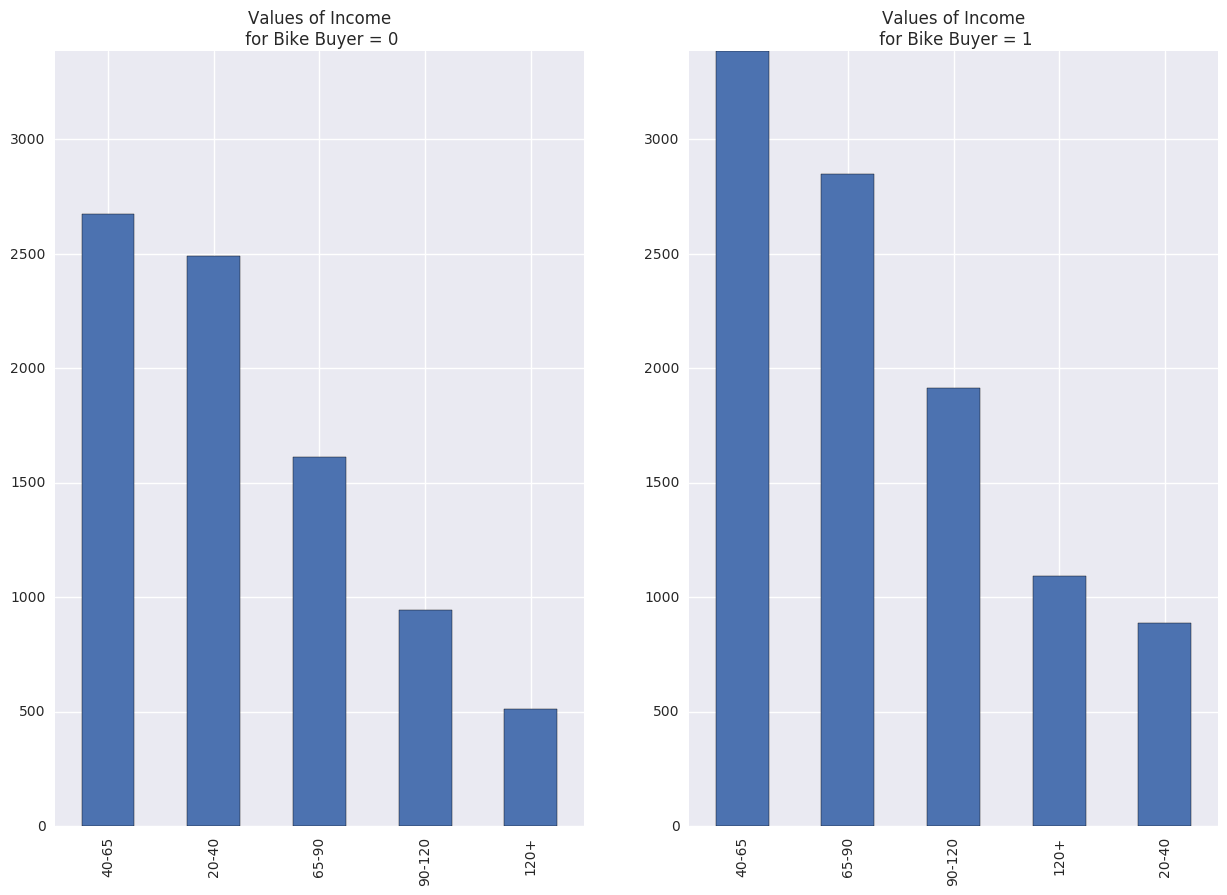

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def cond_barplot(df, cols): 
    for col in cols: 
        temp1 = df.ix[df['BikeBuyer'] == 0, col].value_counts()
        temp0 = df.ix[df['BikeBuyer'] == 1, col].value_counts() 
            
        ylim = [0, max(max(temp1), max(temp0))]
        fig = plt.figure(figsize = (15,10))
        fig.clf()
        ax1 = fig.add_subplot(1, 2, 1)
        ax0 = fig.add_subplot(1, 2, 2) 
        temp1.plot(kind = 'bar', ax = ax1, ylim = ylim)
        ax1.set_title('Values of ' + col + '\n for Bike Buyer = 0')
        temp0.plot(kind = 'bar', ax = ax0, ylim = ylim)
        ax0.set_title('Values of ' + col + '\n for Bike Buyer = 1')
    return "Done"

cols = ['Gender', 'Education', 'Occupation', 'MaritalStatus', 'CountryRegionName', 'HomeOwnerFlag', 'age', 'NumberChildrenAtHome', 'TotalChildren', 'NumberCarsOwned', 'Income']
cond_barplot(frame, cols)


'Done'

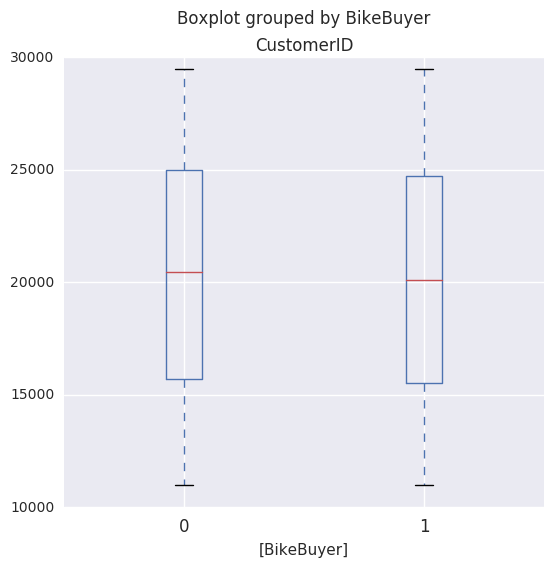

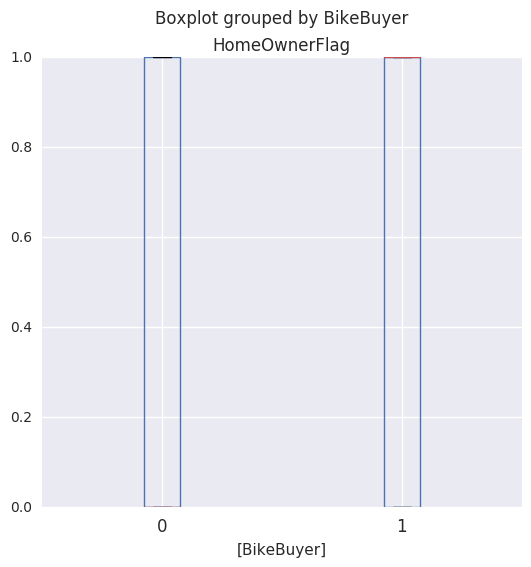

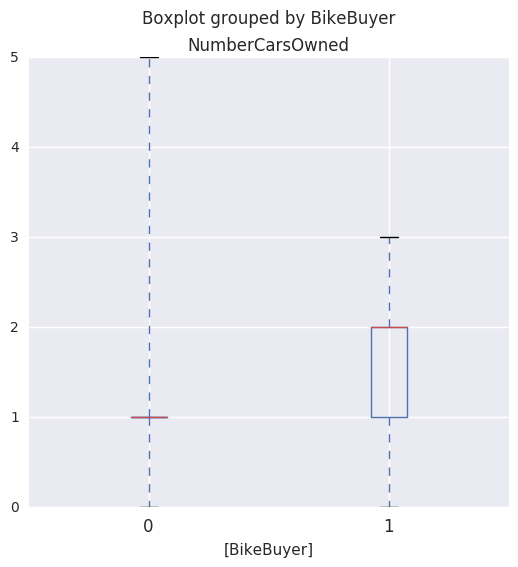

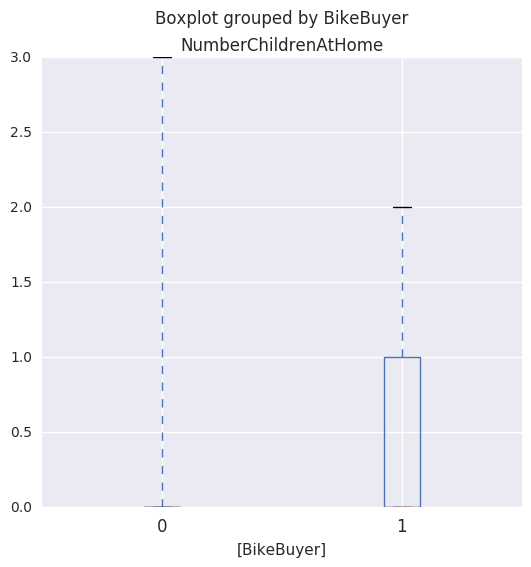

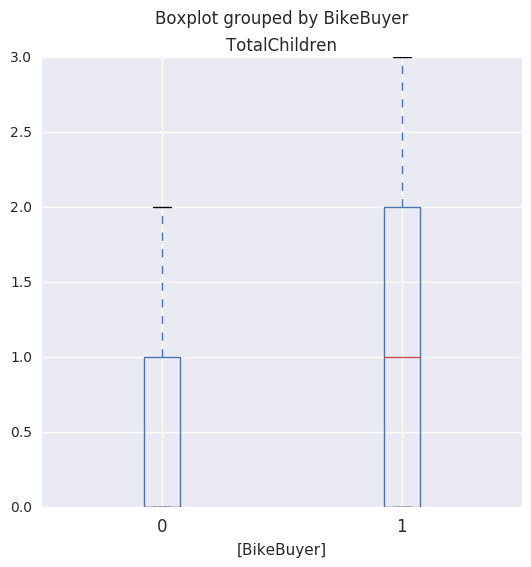

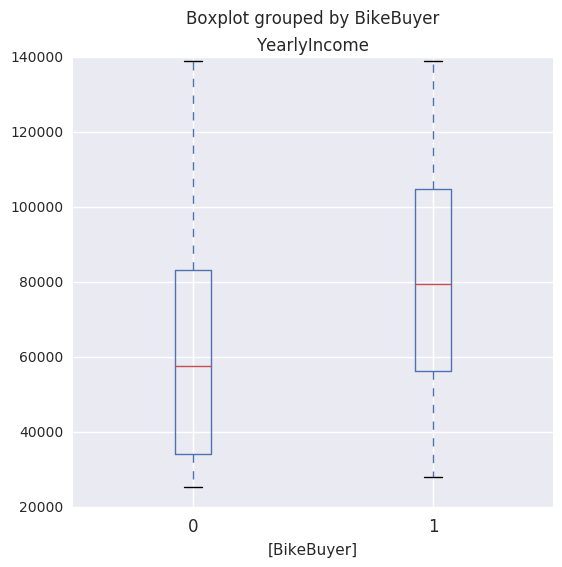

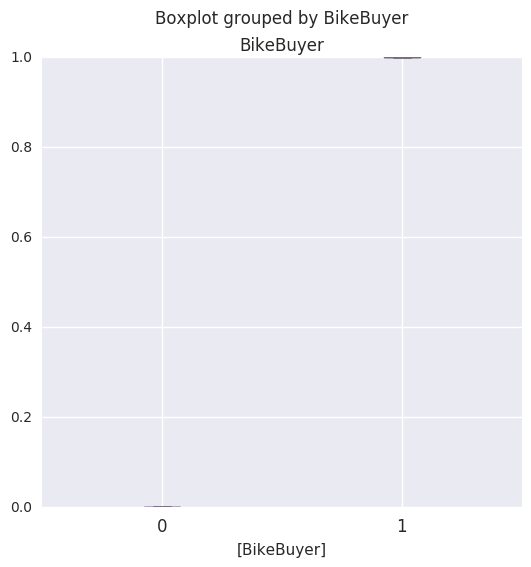

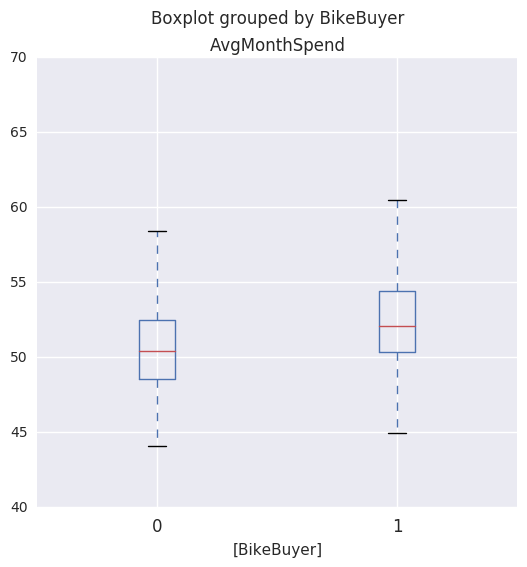

In [7]:
## Plot categorical variables as box plots
def income_boxplot(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):                  
            fig = plt.figure(figsize = (6,6))
            fig.clf()
            ax = fig.gca() 
            df.boxplot(column = [col], ax = ax, by = ['BikeBuyer'])          
    return('Done') 

income_boxplot(frame)

'Done'

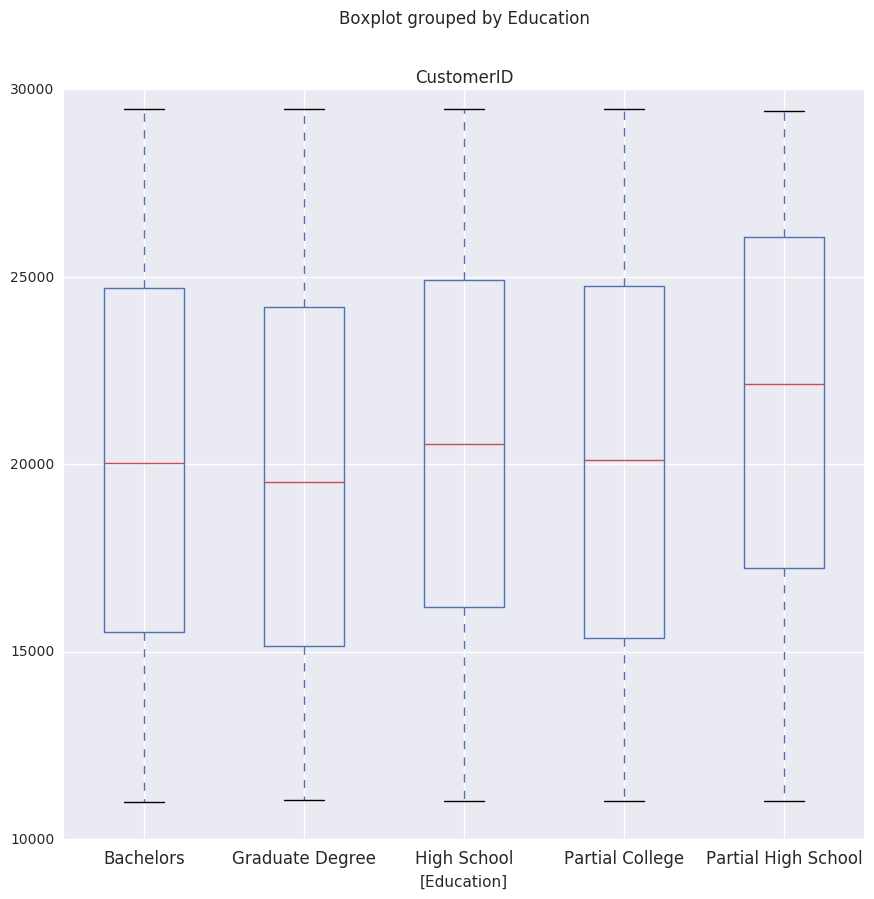

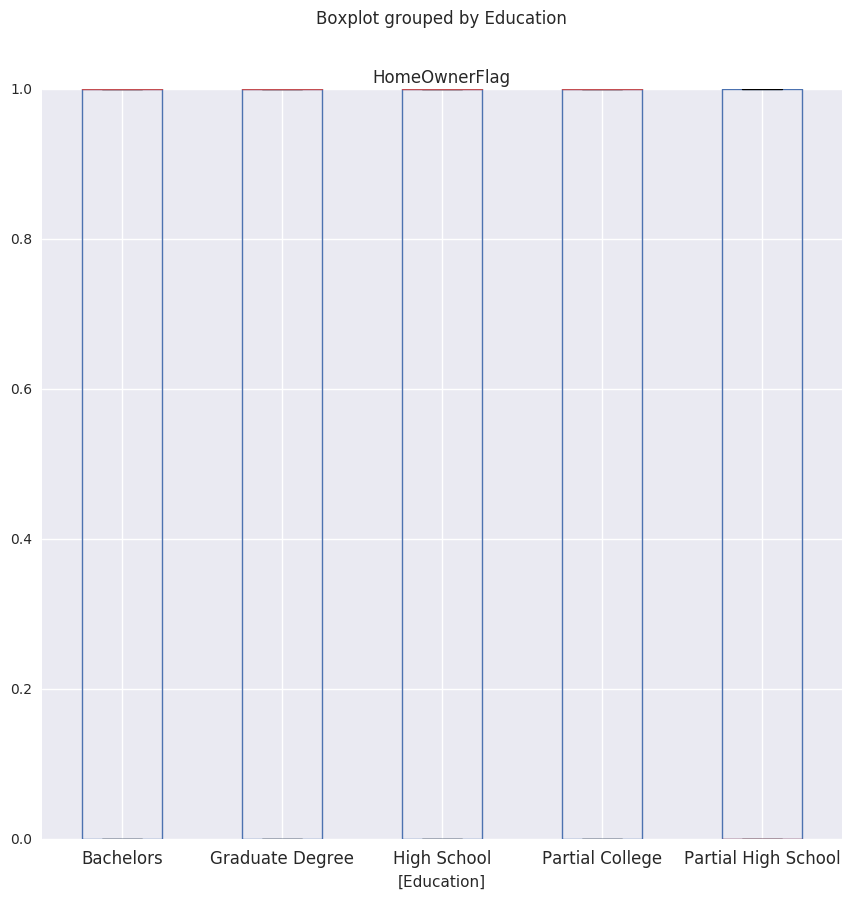

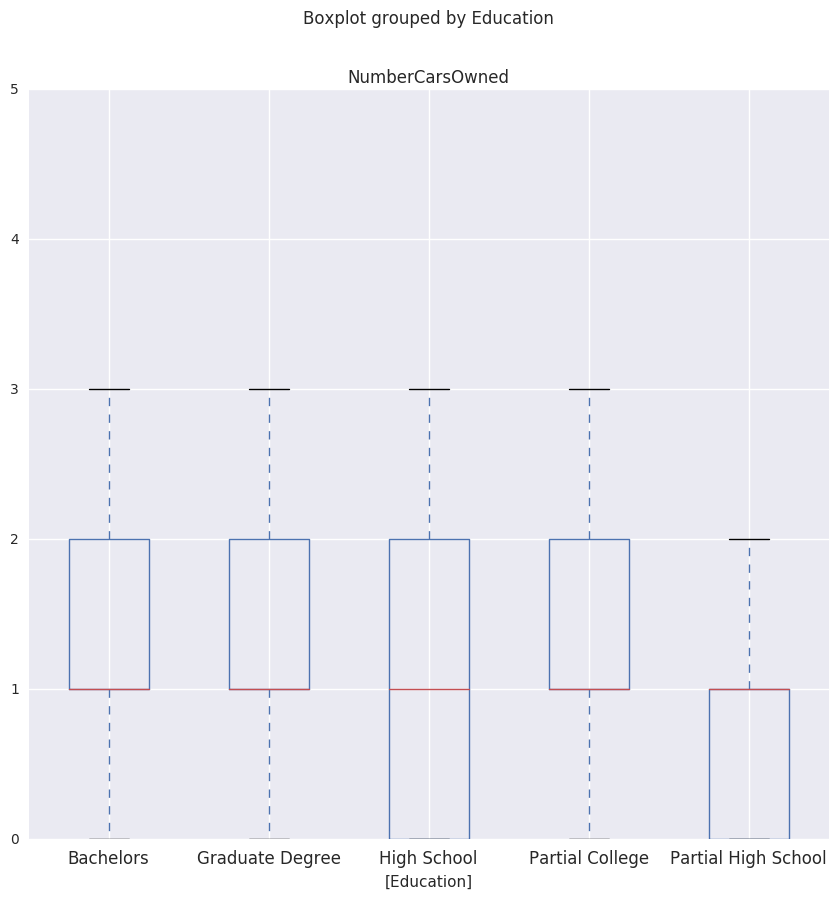

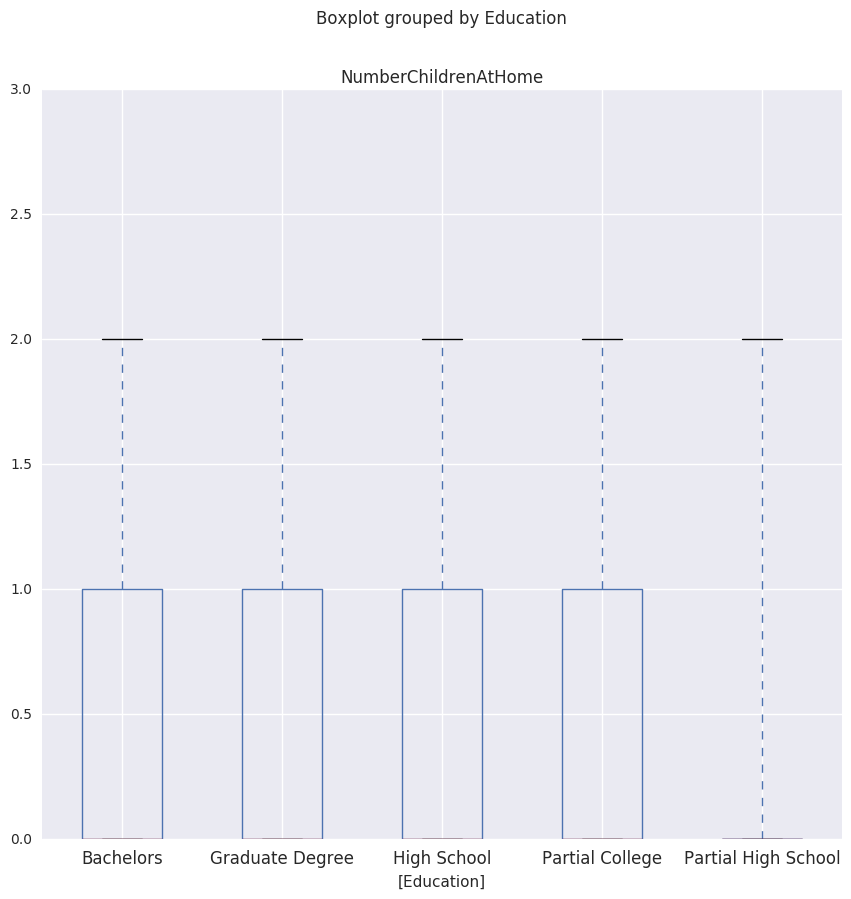

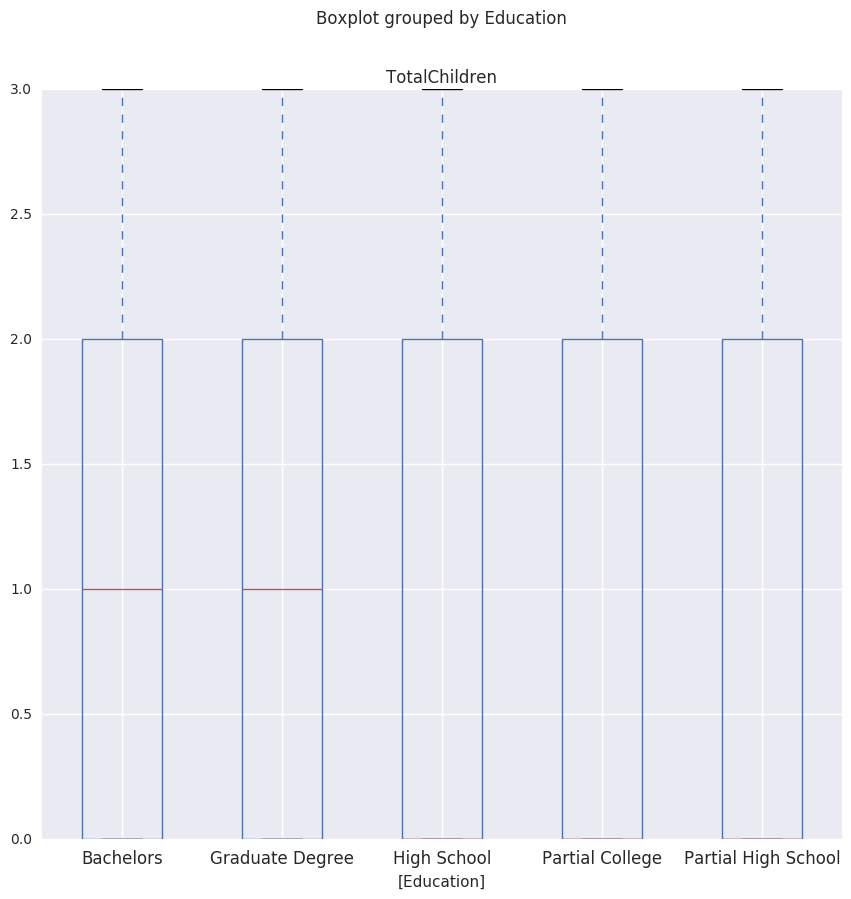

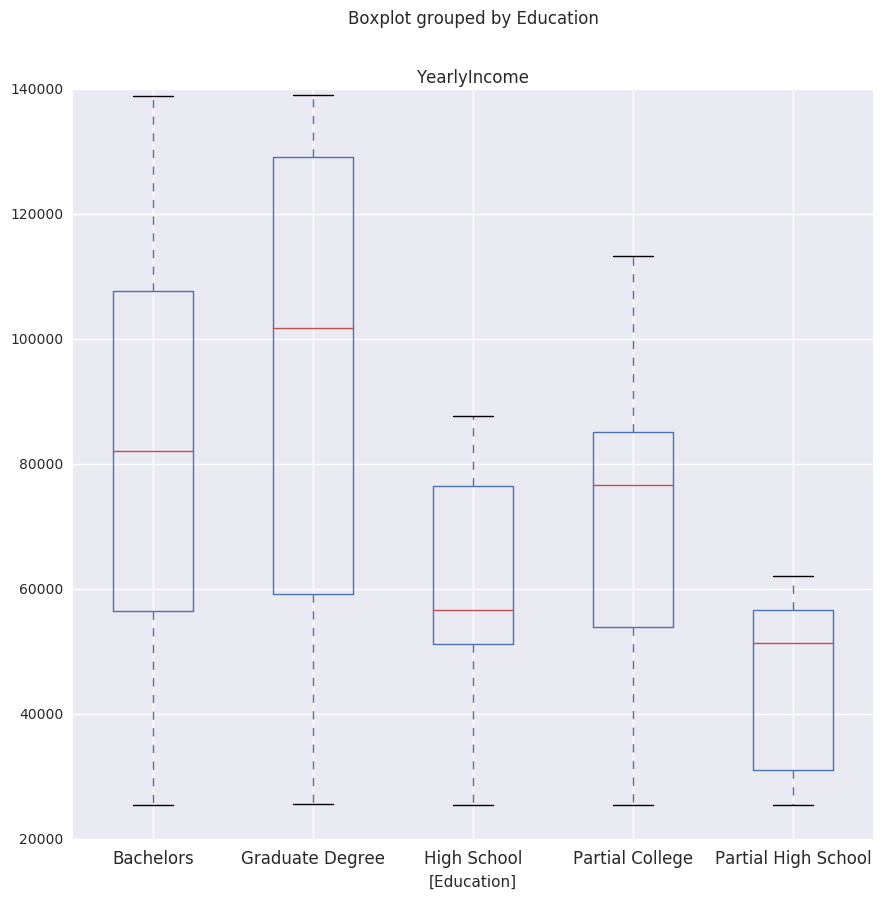

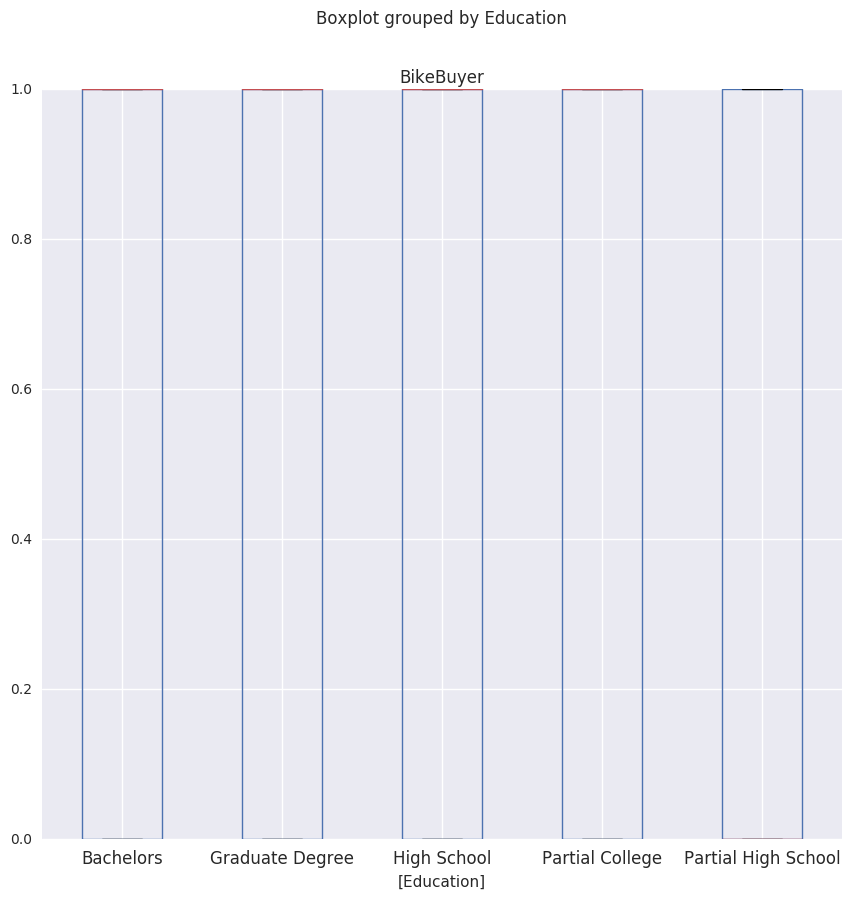

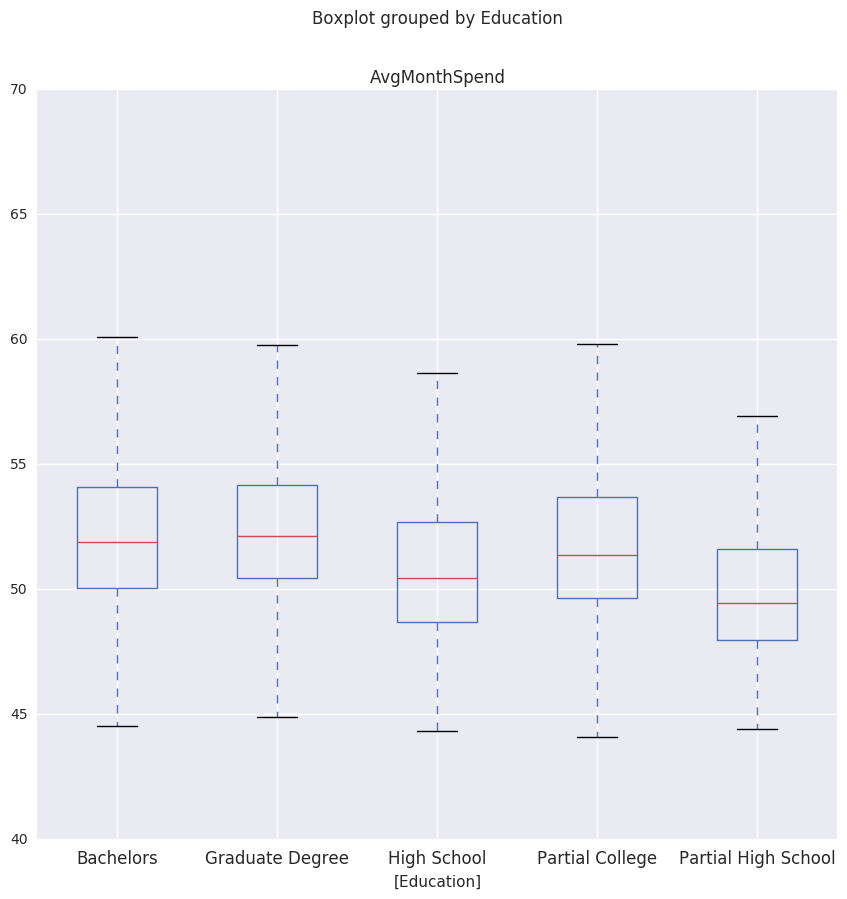

In [8]:
## Plot categorical variables as box plots
def income_boxplot(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):                  
            fig = plt.figure(figsize = (10,10))
            ax = fig.gca() 
            ax.set_axis_bgcolor("#EAEAF2")
            df.boxplot(column = [col], ax = ax, by = ['Education'])          
    return('Done') 

income_boxplot(frame)

'Done'

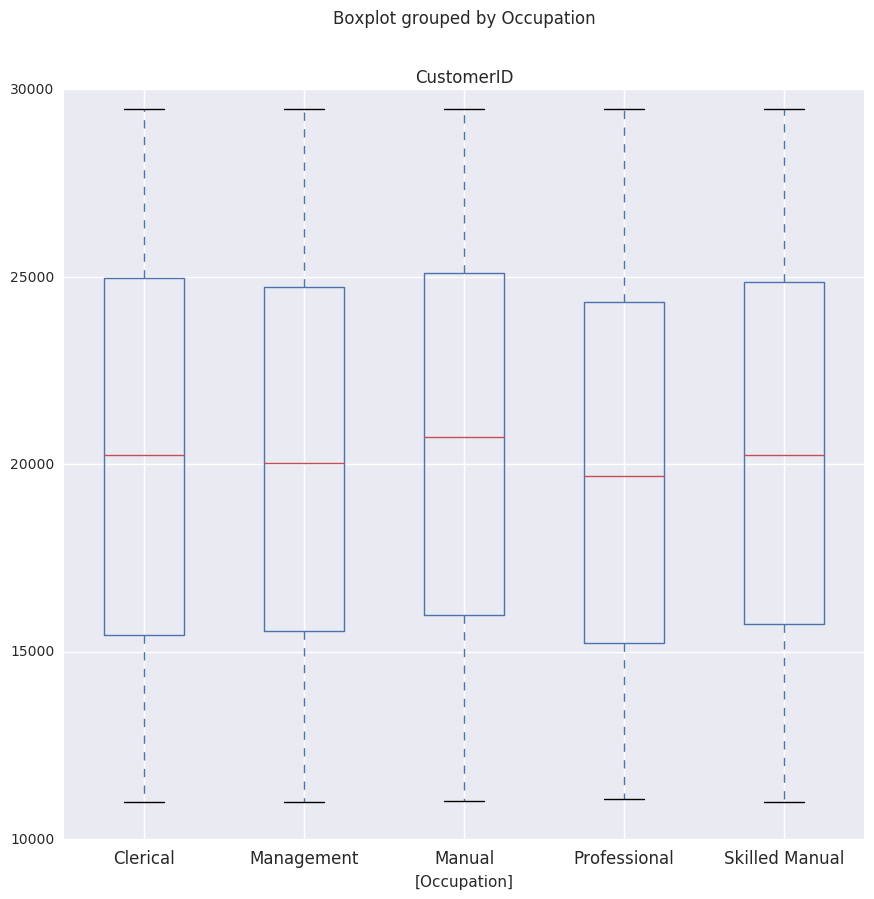

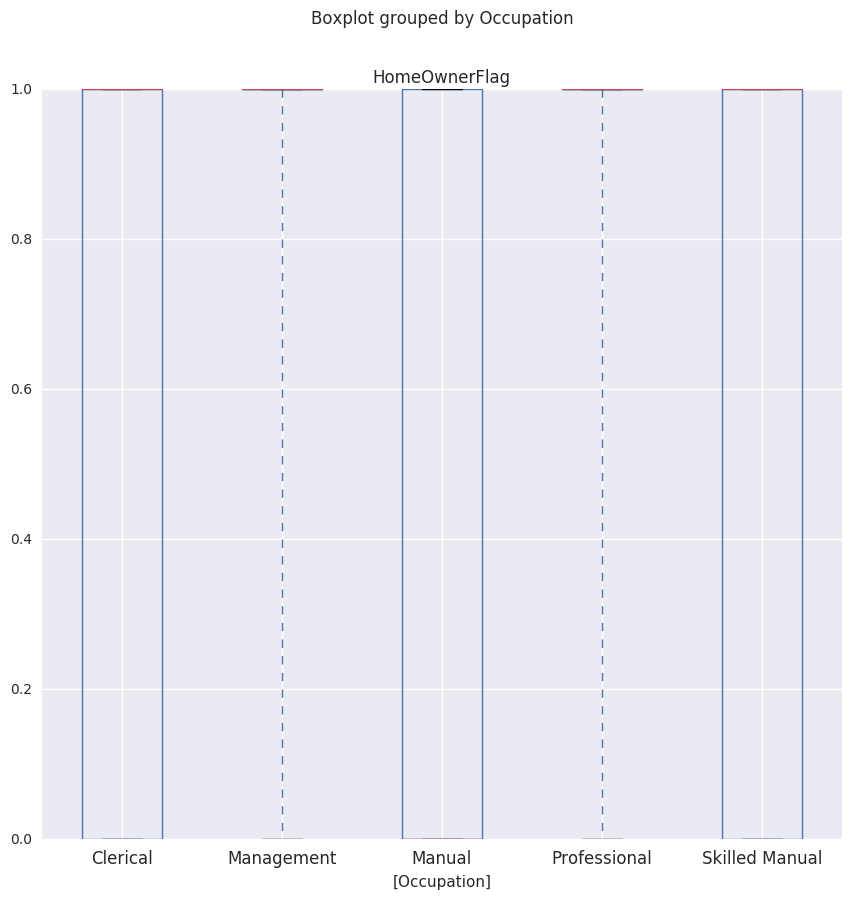

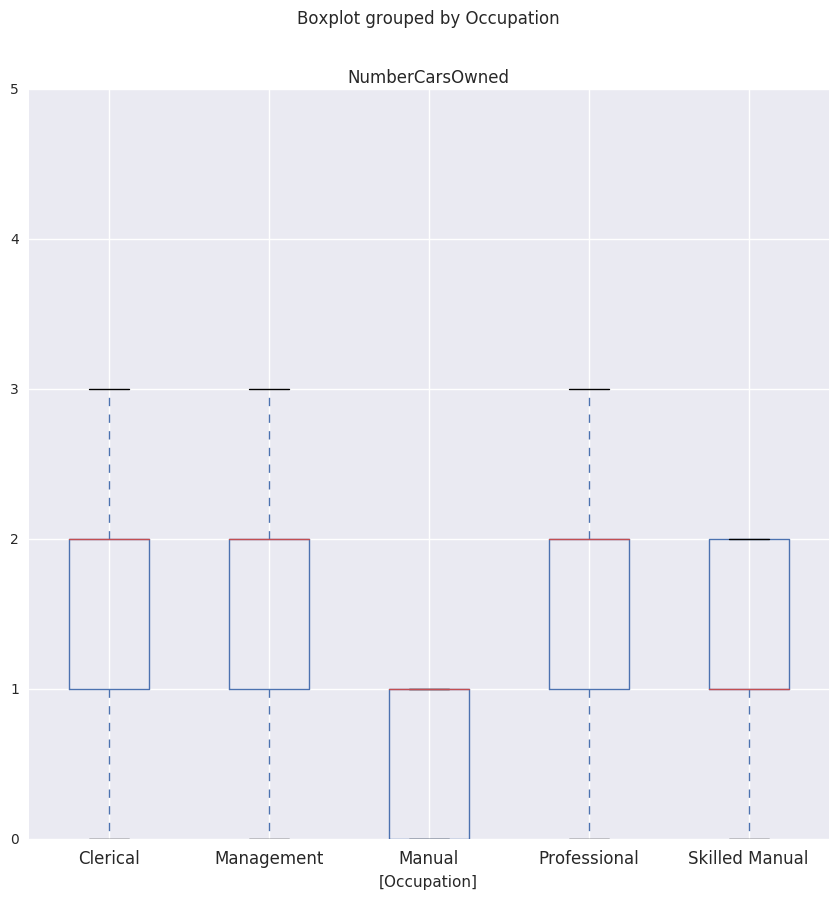

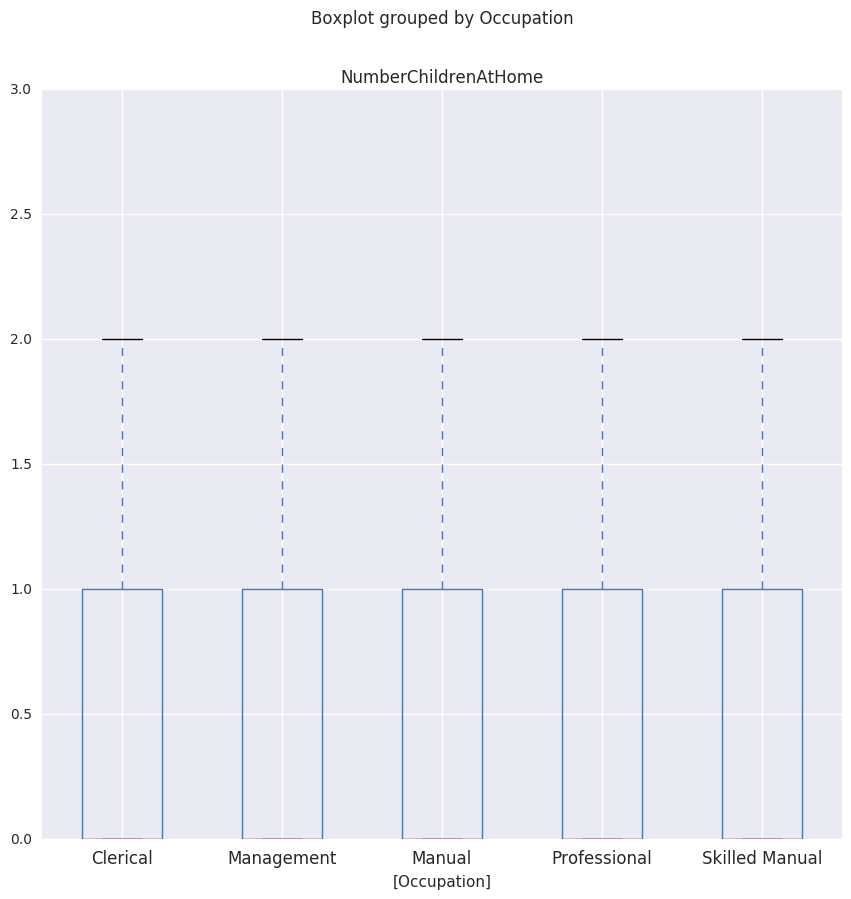

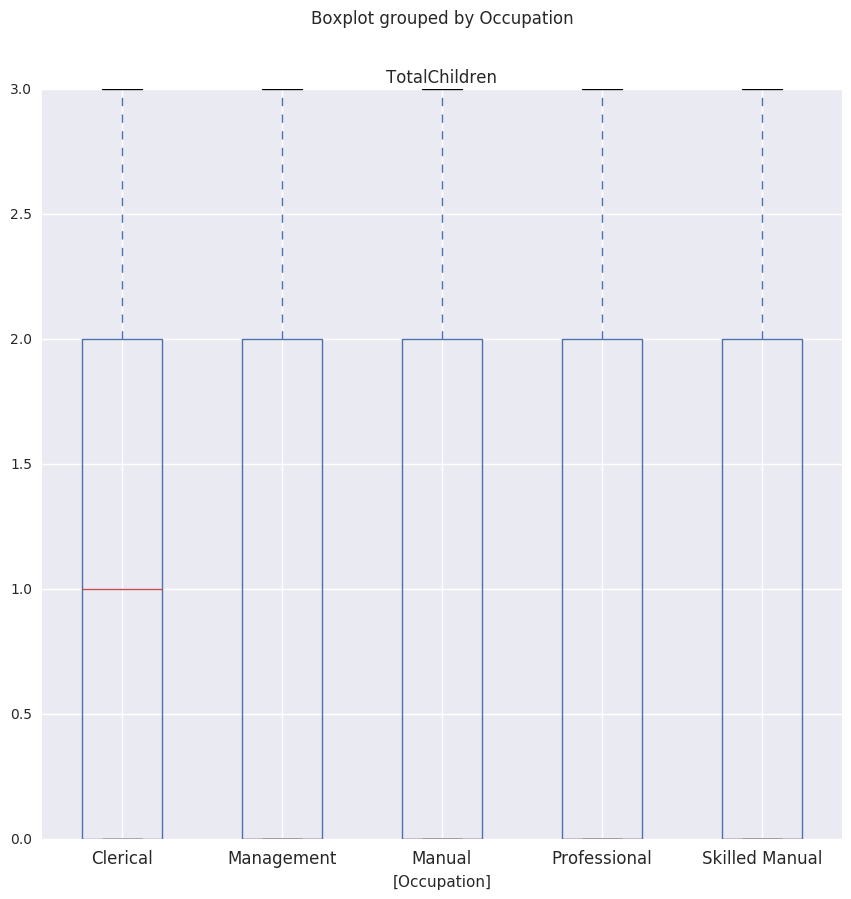

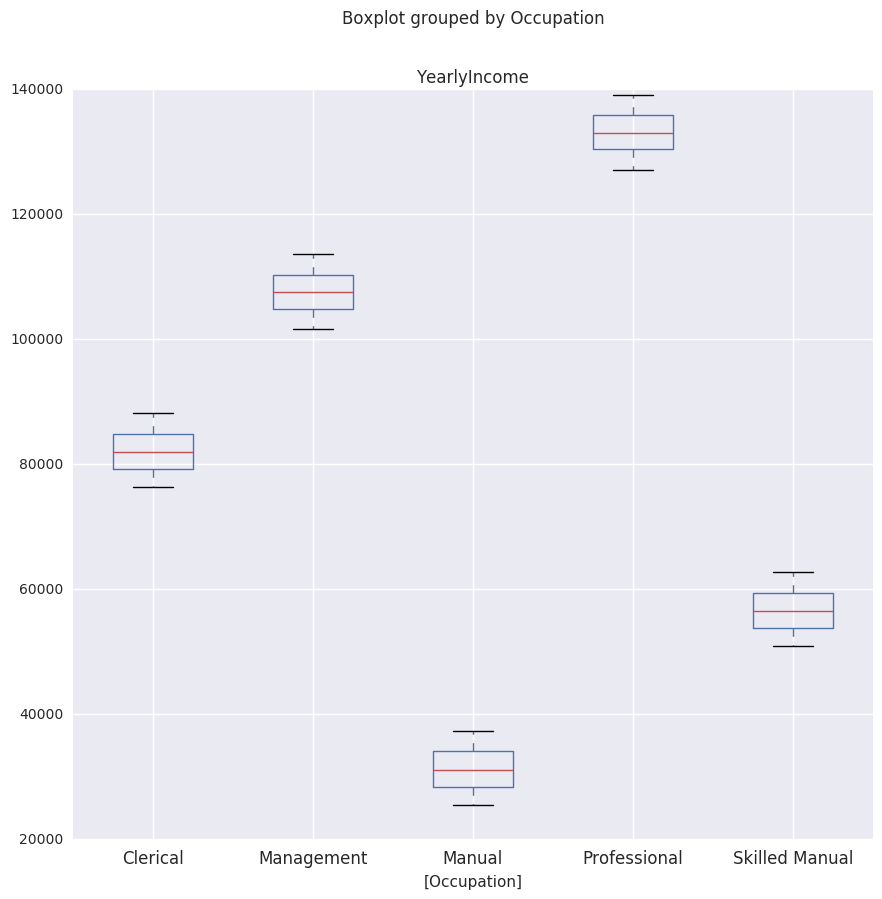

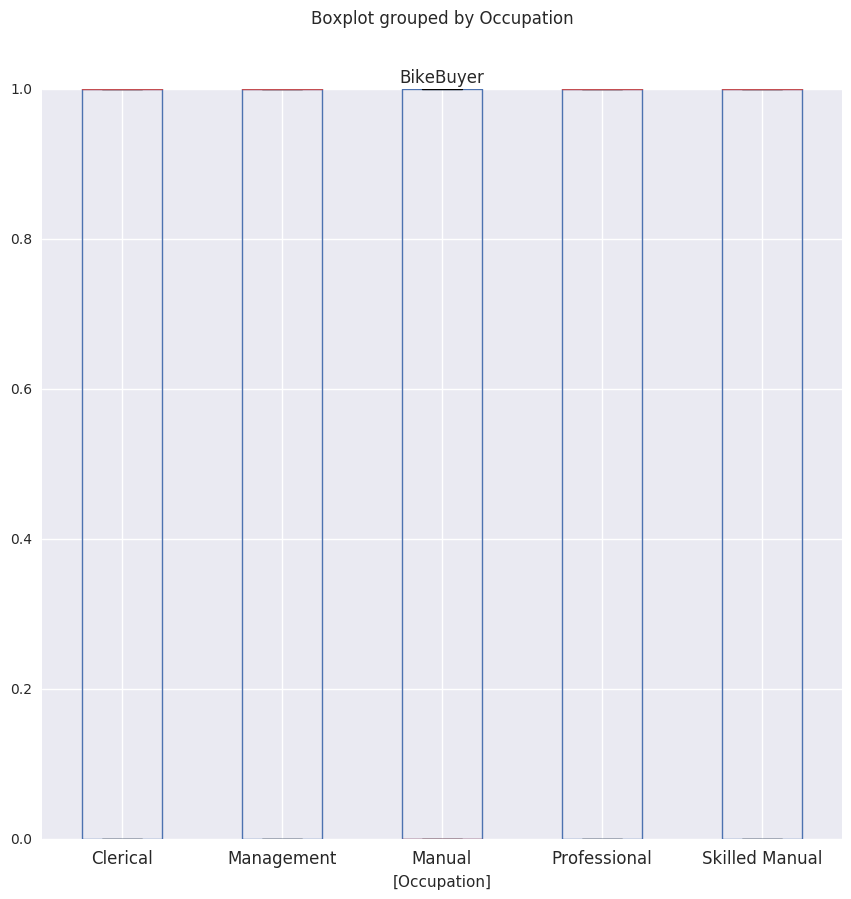

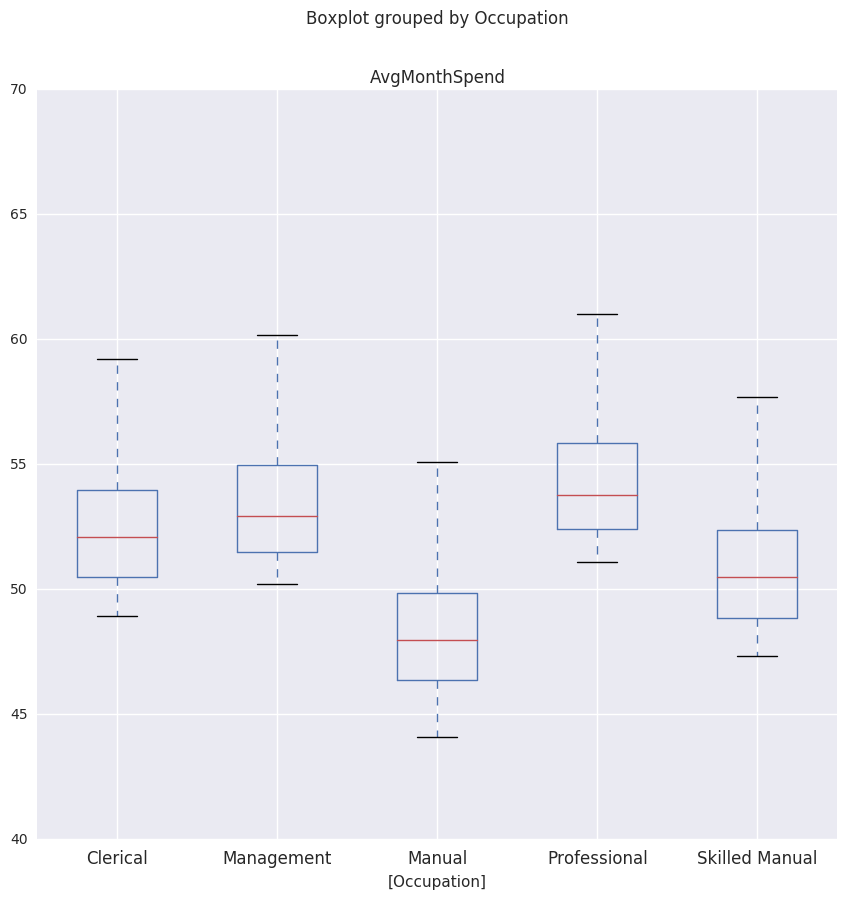

In [9]:
## Plot categorical variables as box plots
def income_boxplot(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):                  
            fig = plt.figure(figsize = (10,10))
            fig.clf()
            ax = fig.gca() 
            df.boxplot(column = [col], ax = ax, by = ['Occupation'])          
    return('Done') 

income_boxplot(frame)

'Done'

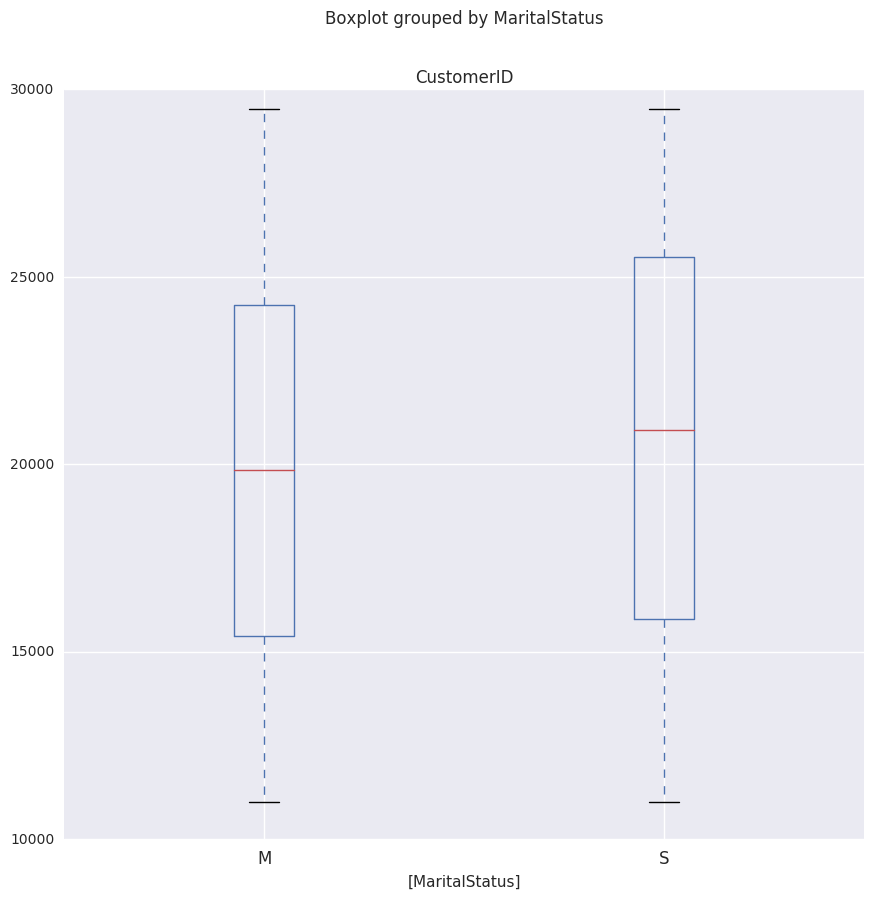

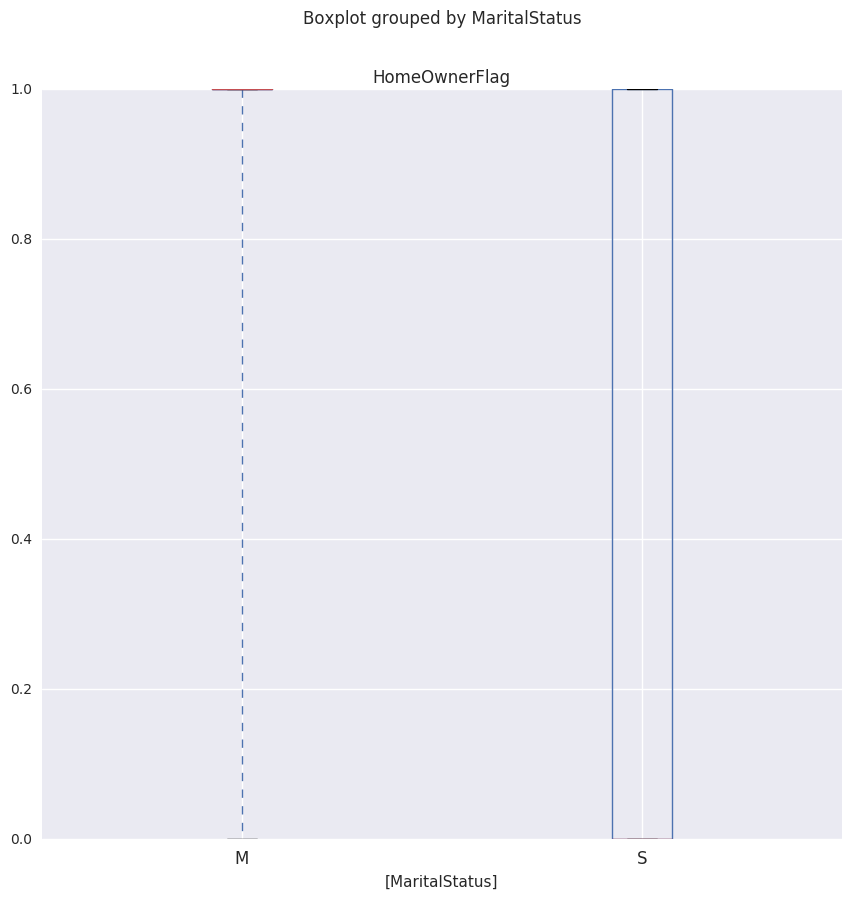

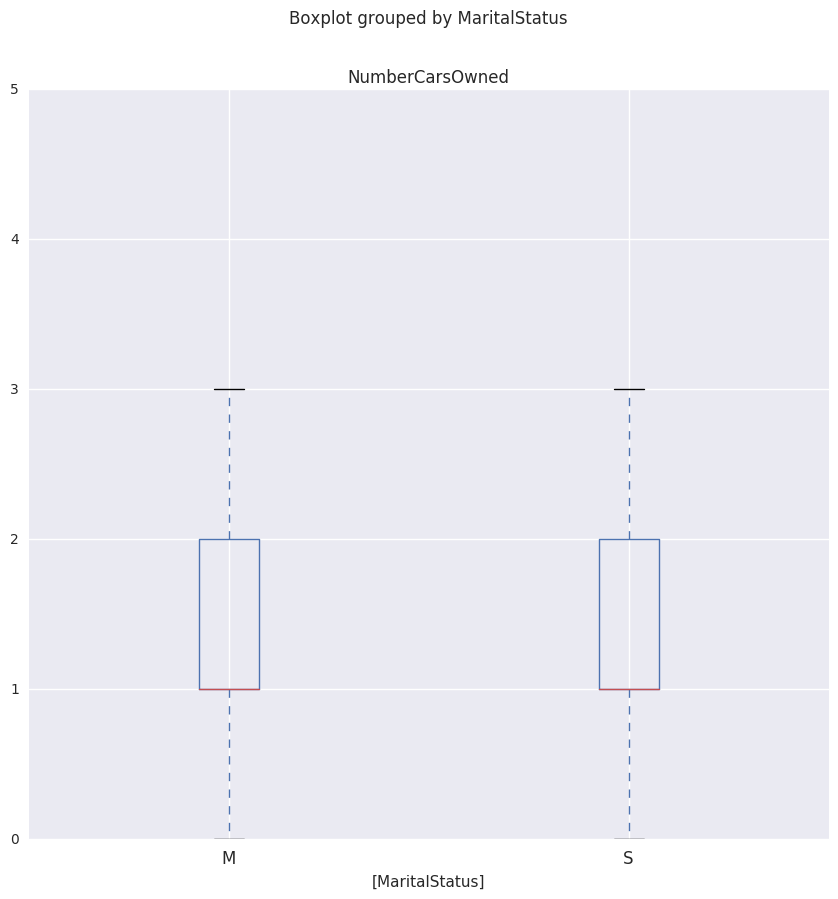

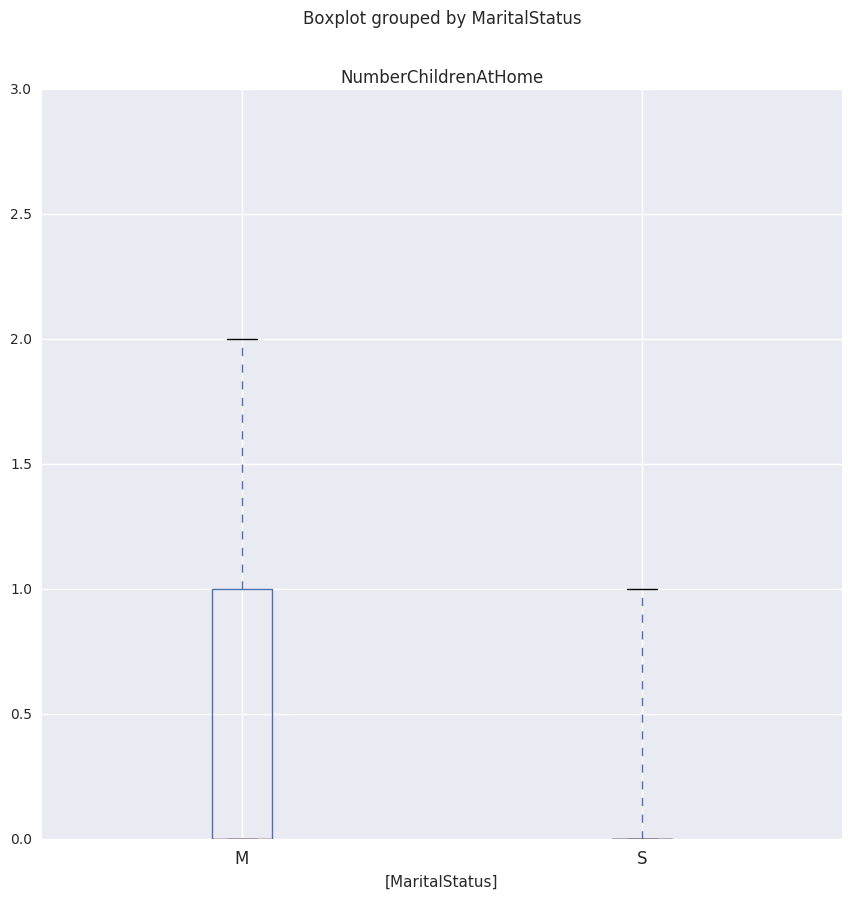

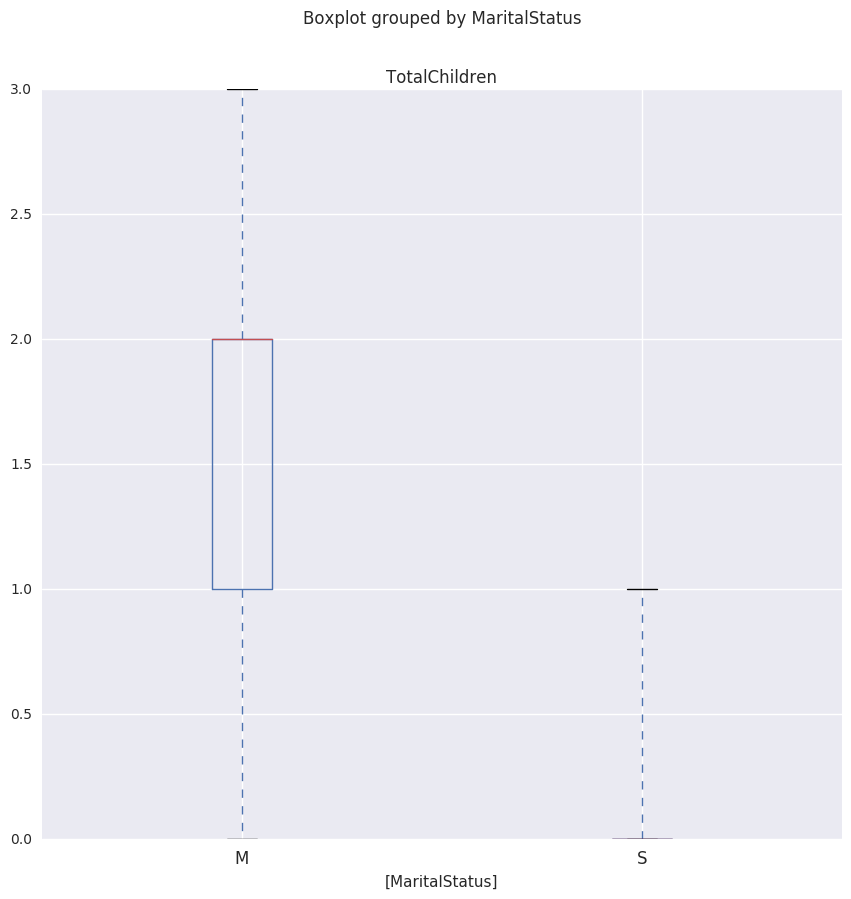

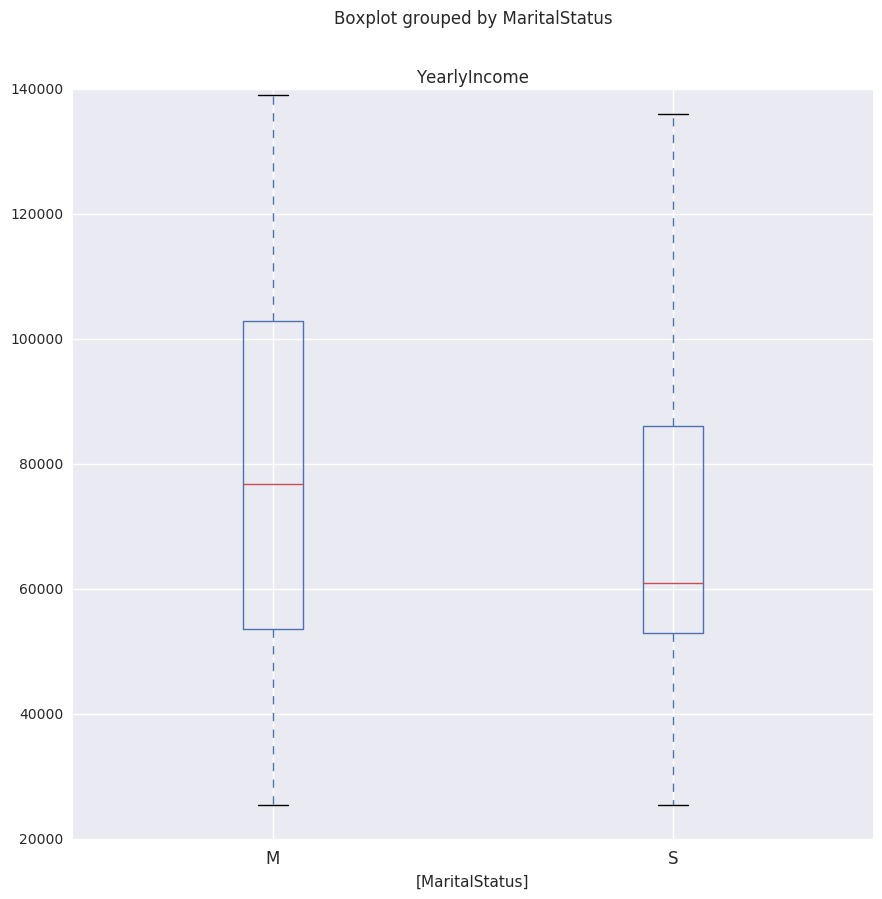

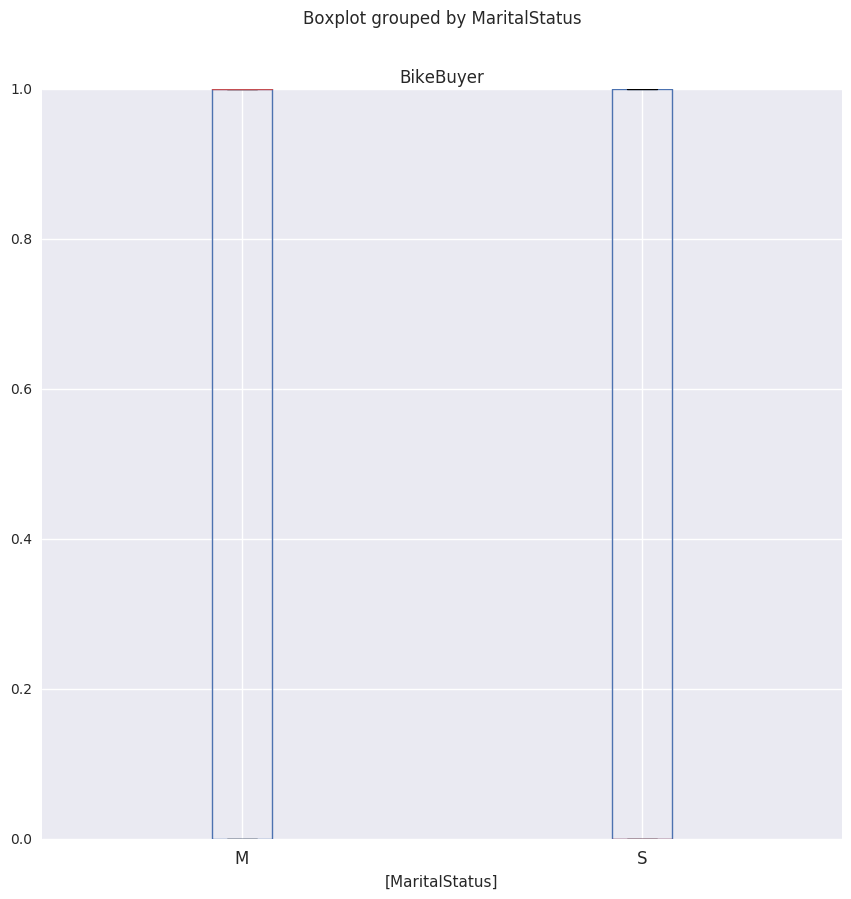

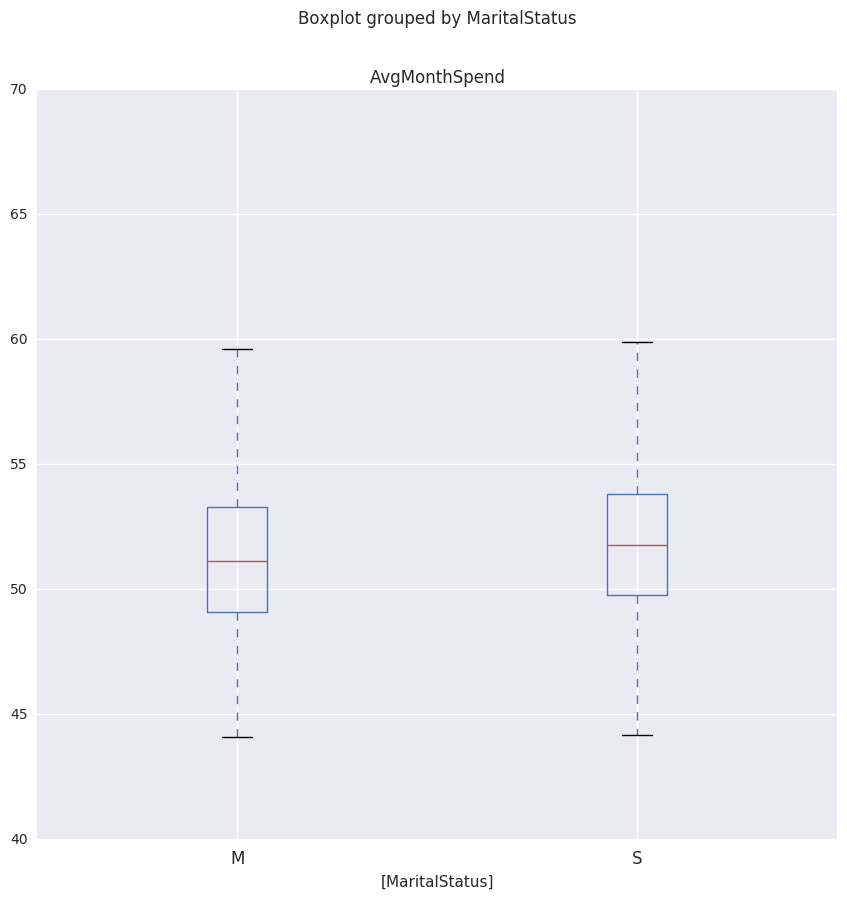

In [10]:
## Plot categorical variables as box plots
def income_boxplot(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):                  
            fig = plt.figure(figsize = (10,10))
            fig.clf()
            ax = fig.gca() 
            df.boxplot(column = [col], ax = ax, by = ['MaritalStatus'])          
    return('Done') 

income_boxplot(frame)

'Done'

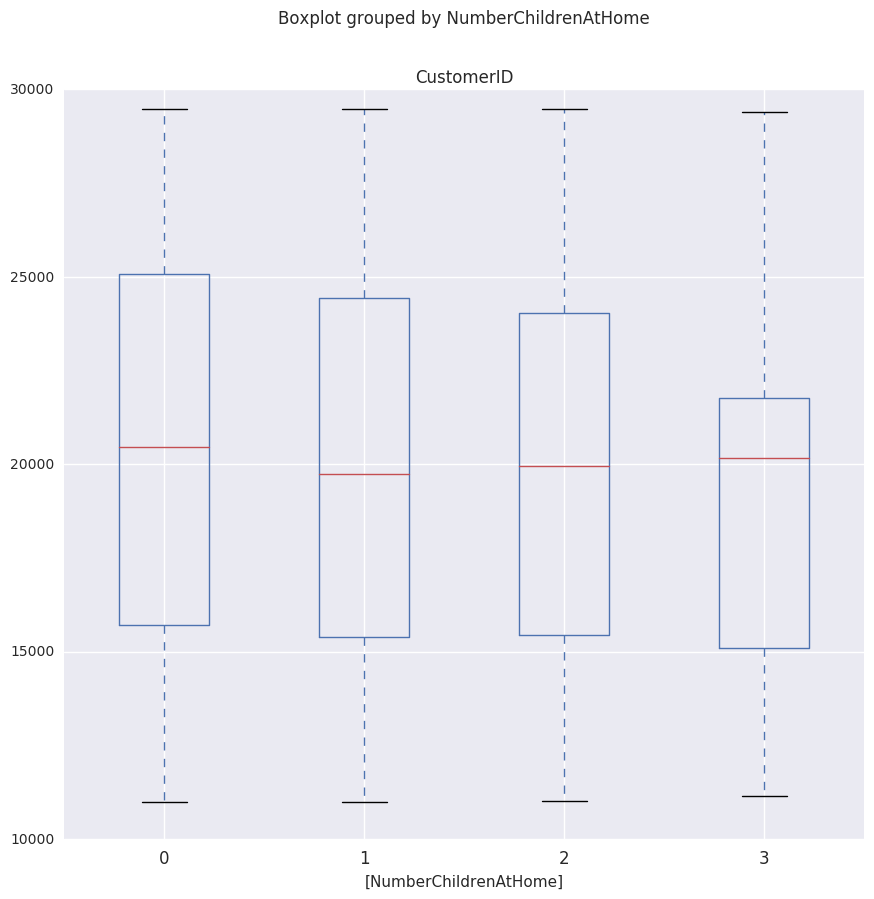

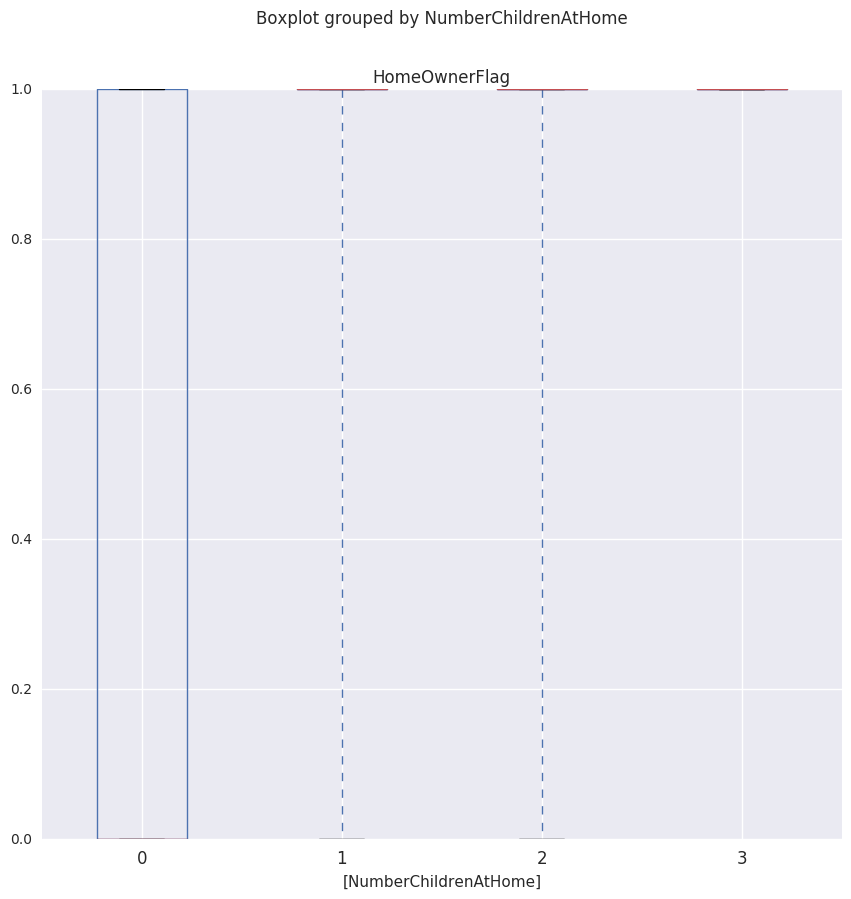

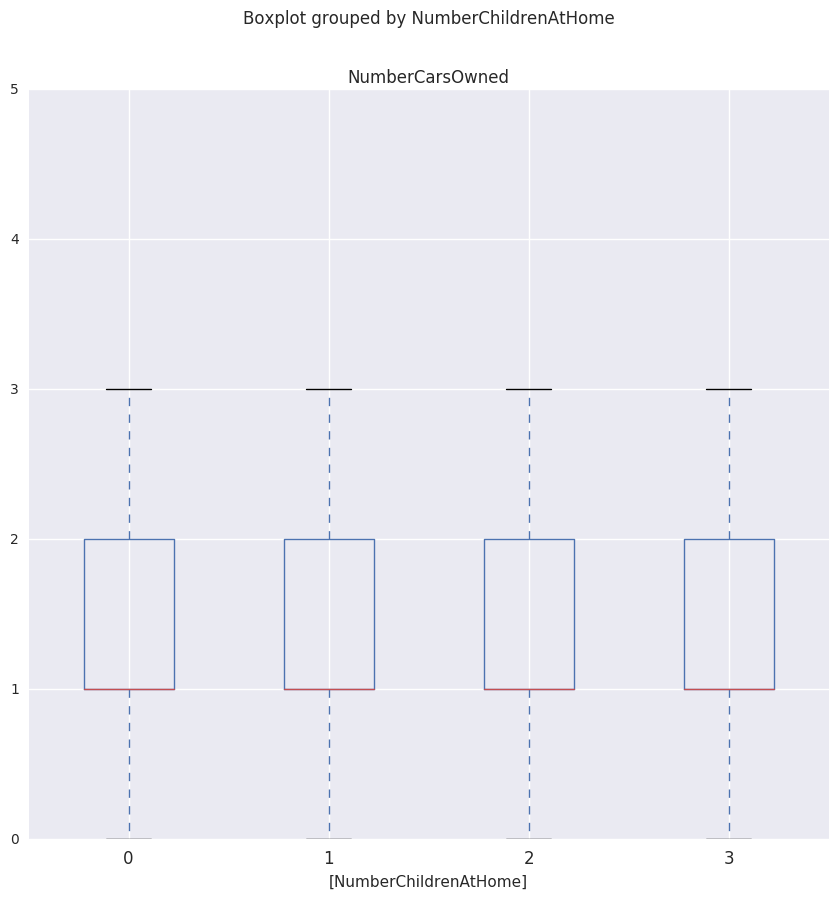

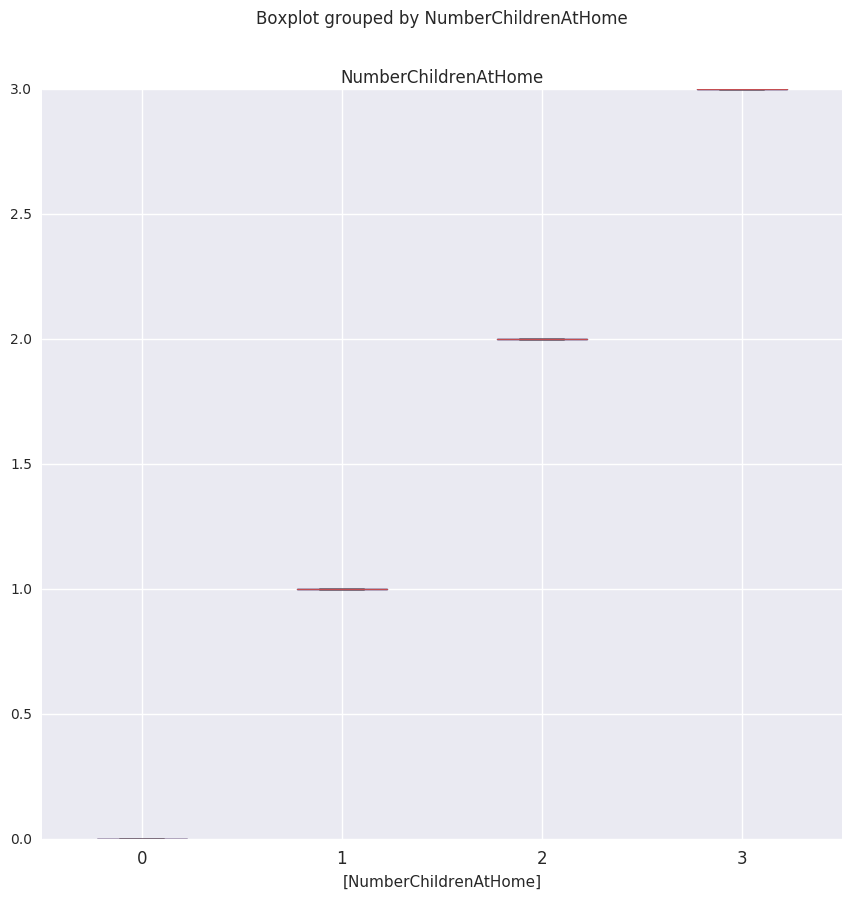

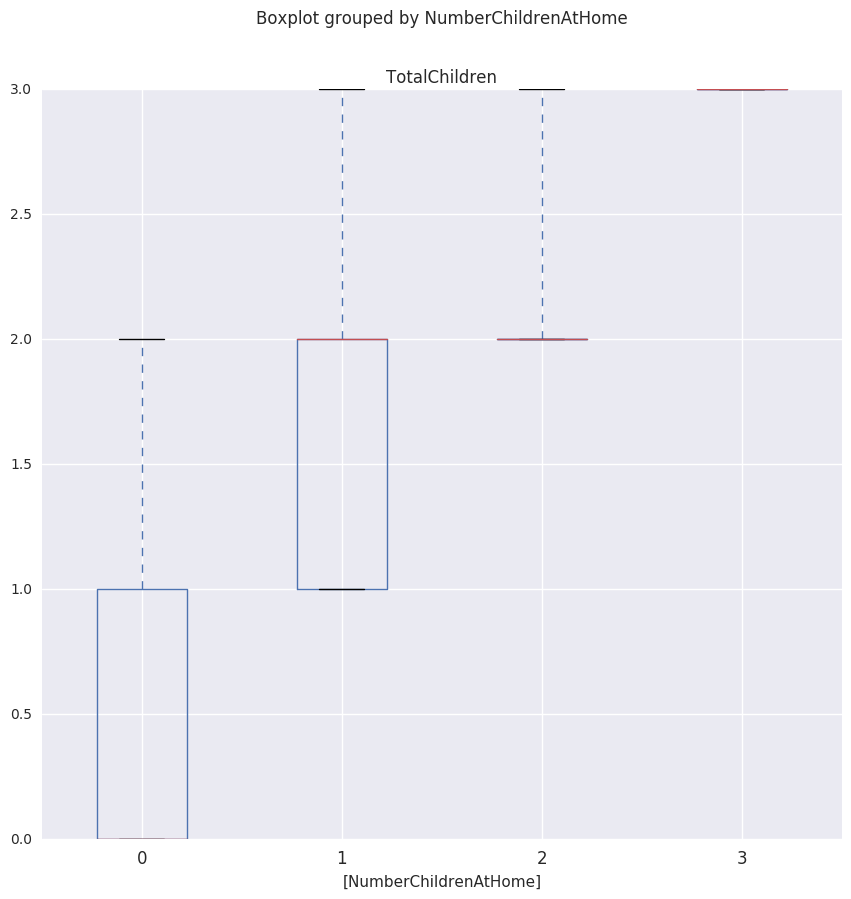

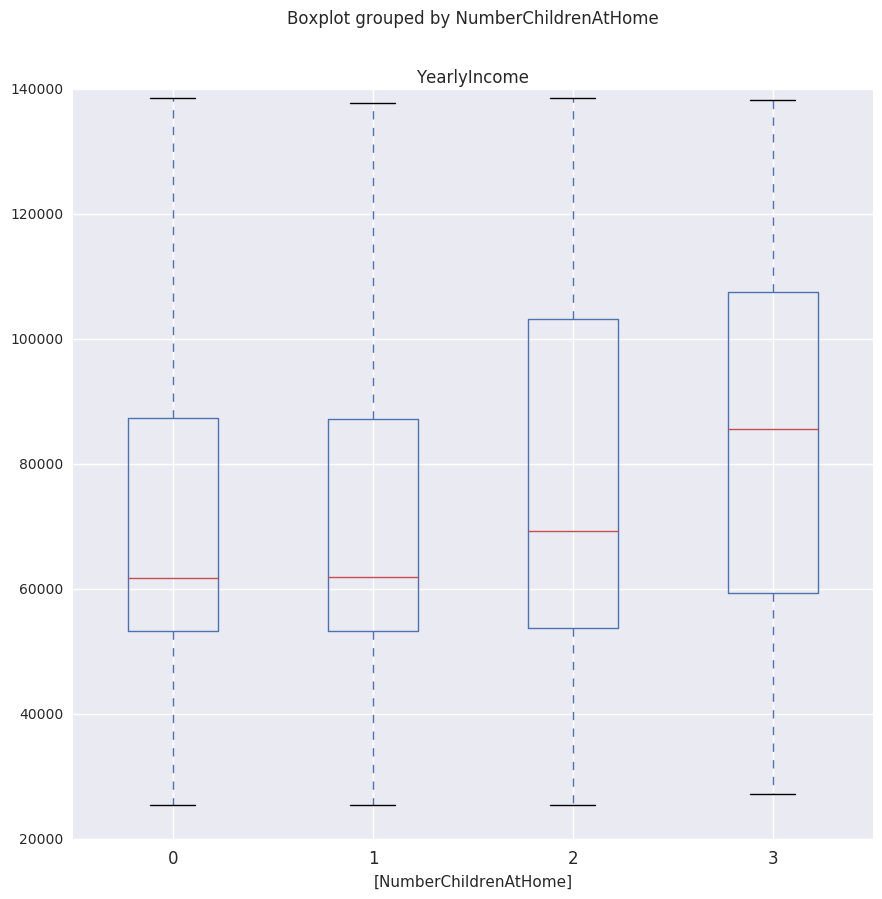

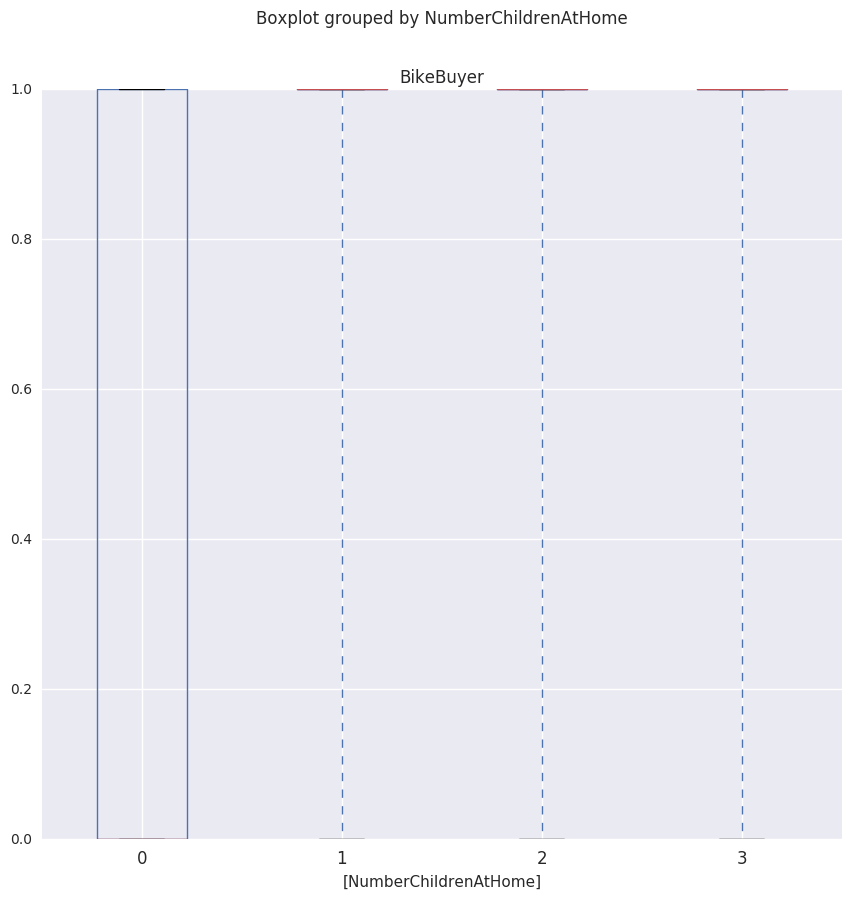

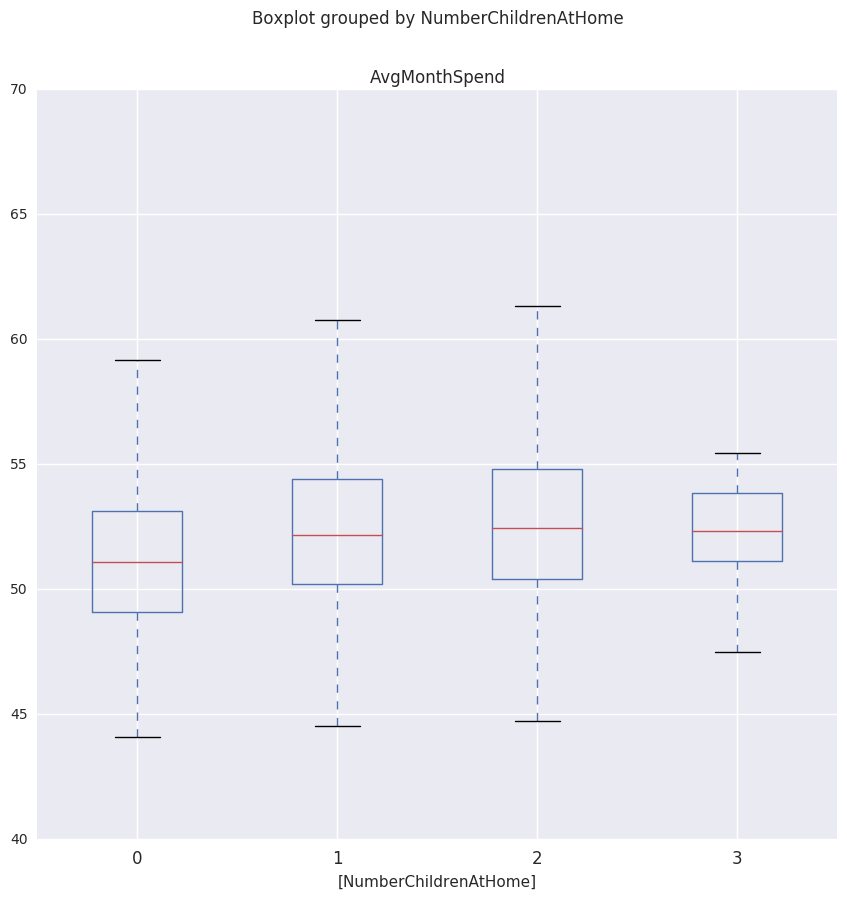

In [11]:
## Plot categorical variables as box plots
def income_boxplot(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):                  
            fig = plt.figure(figsize = (10,10))
            fig.clf()
            ax = fig.gca()
            ax.set_axis_bgcolor("#EAEAF2")
            df.boxplot(column = [col], ax = ax, by = ['NumberChildrenAtHome'])          
    return('Done') 

income_boxplot(frame)

'Done'

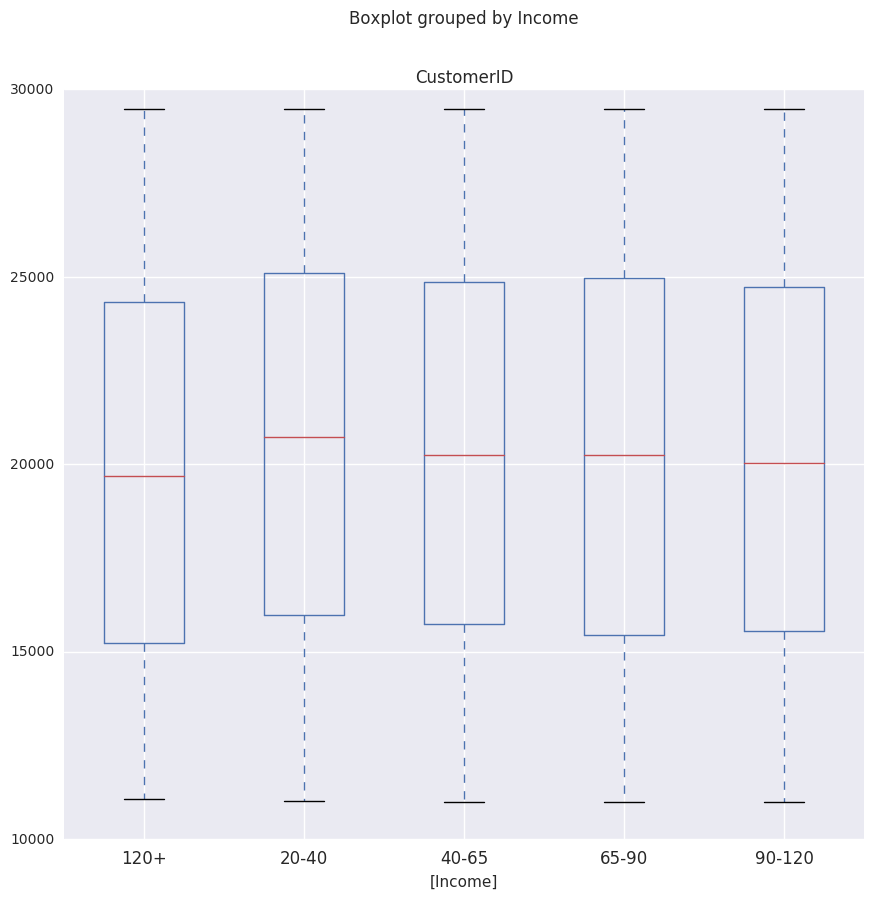

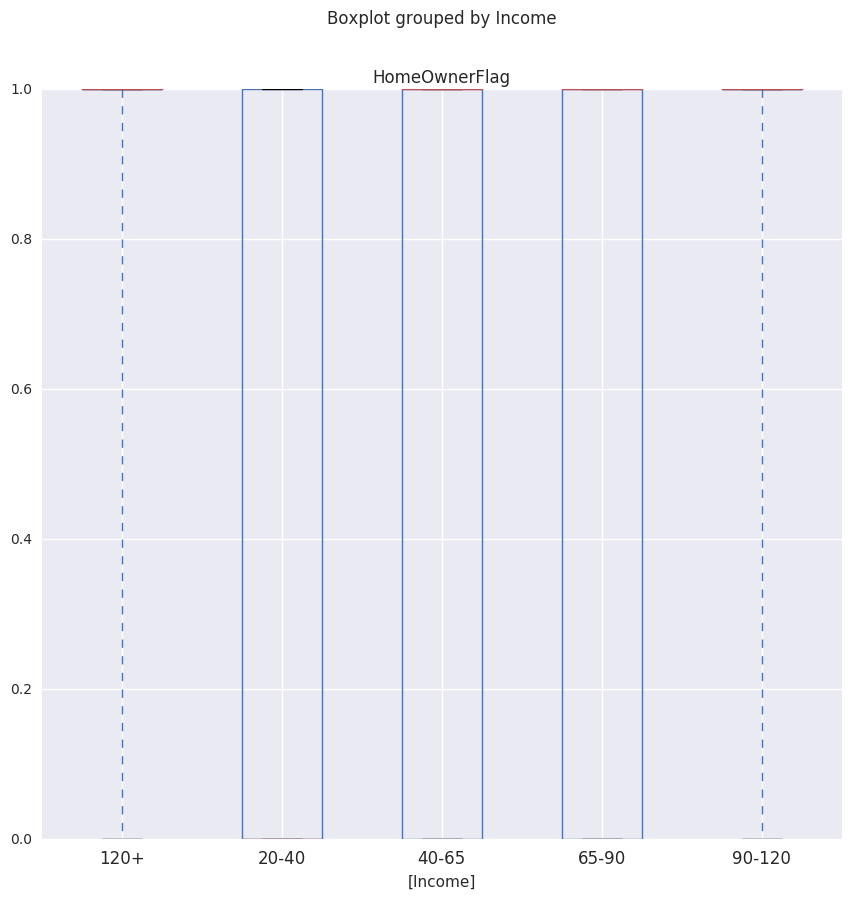

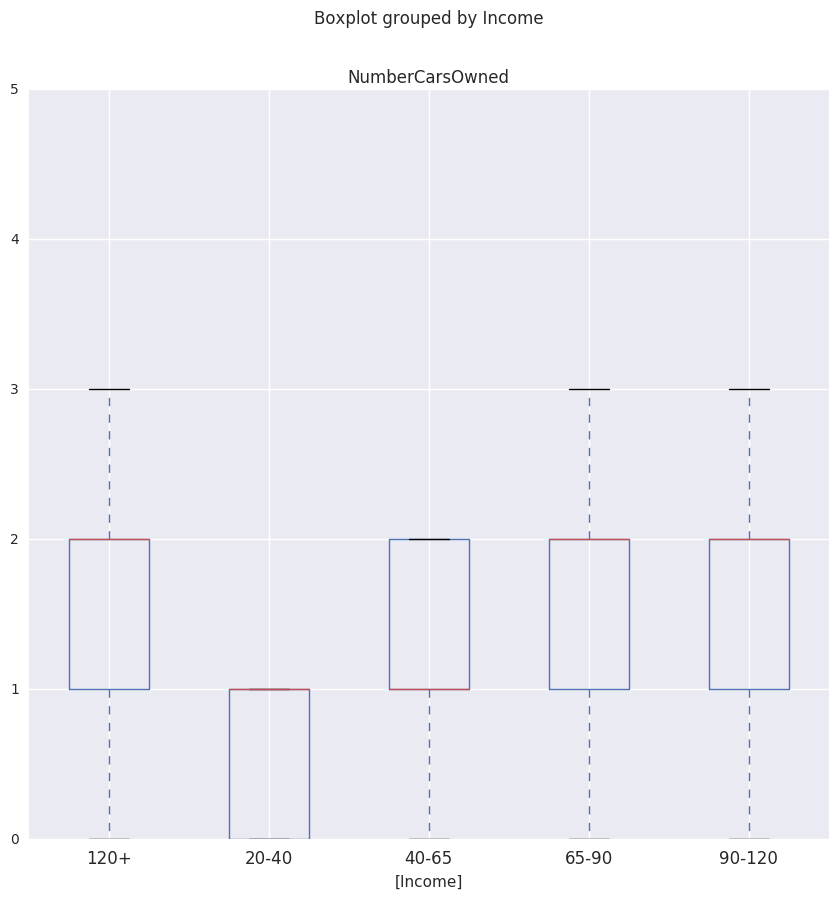

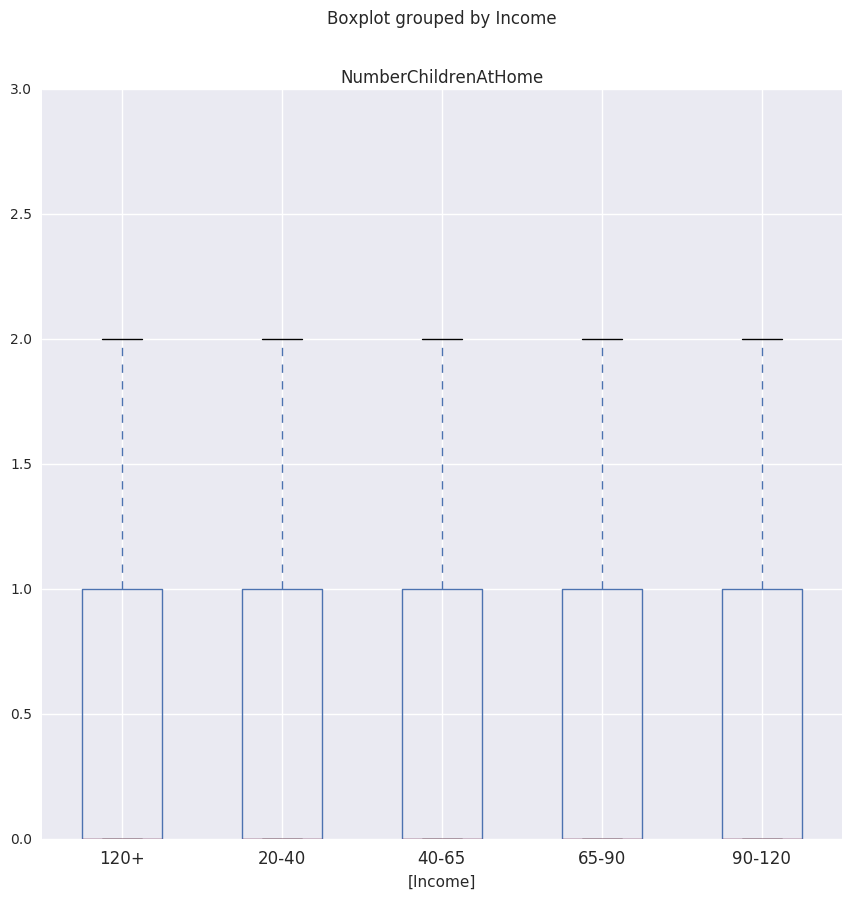

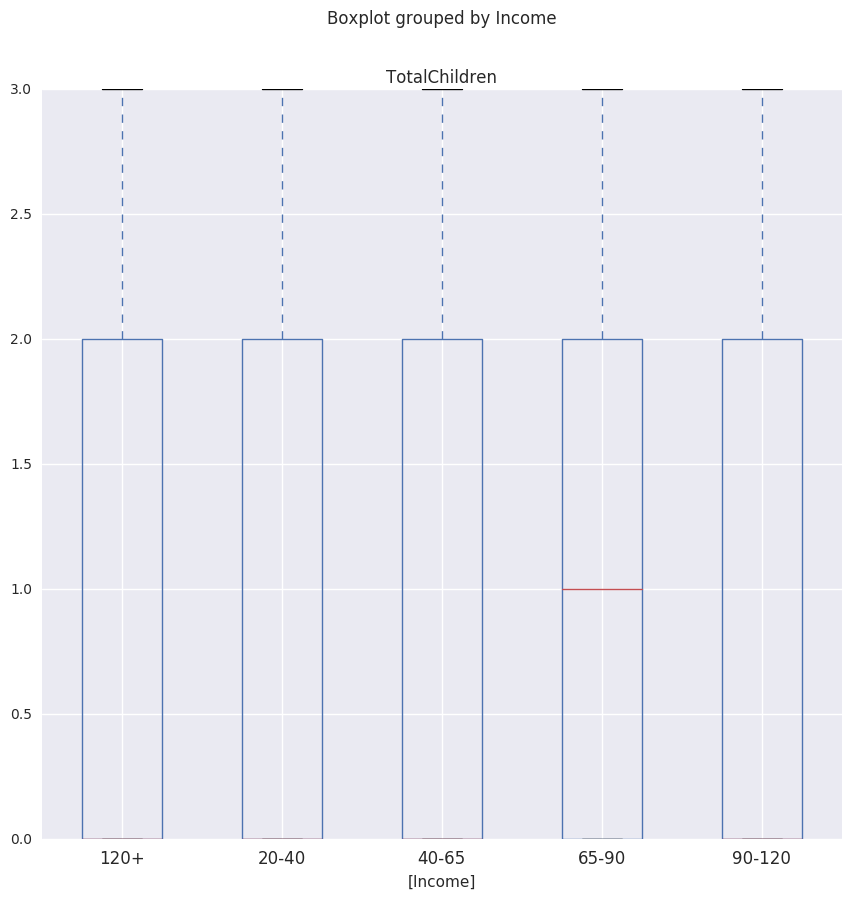

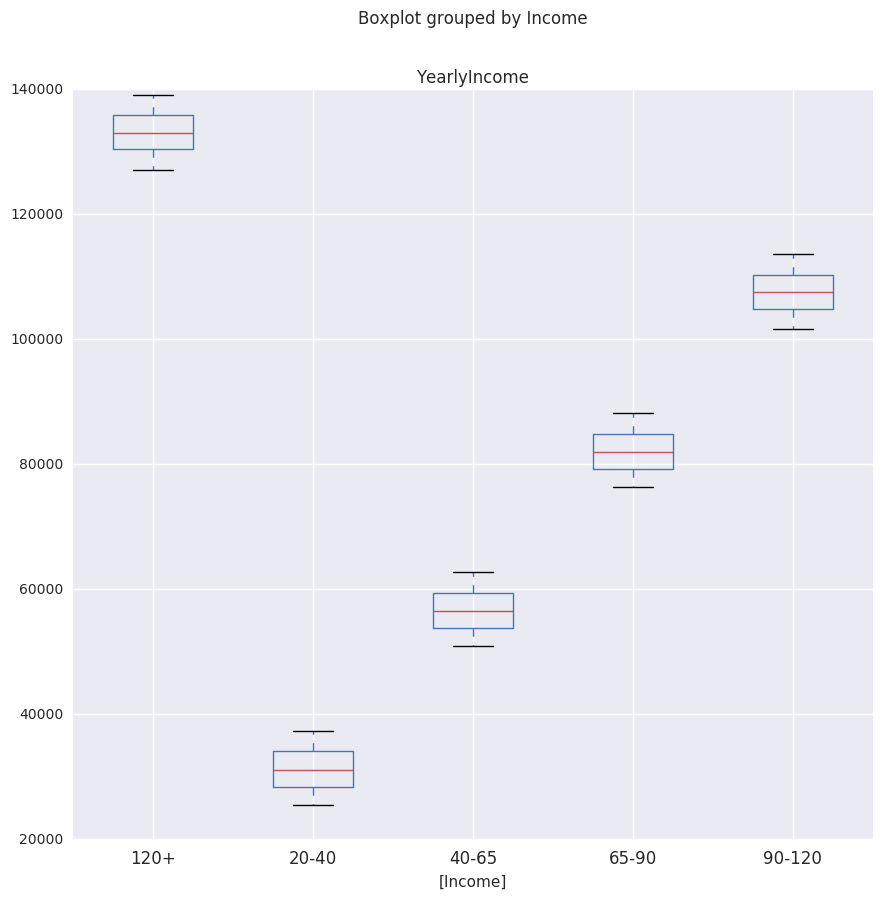

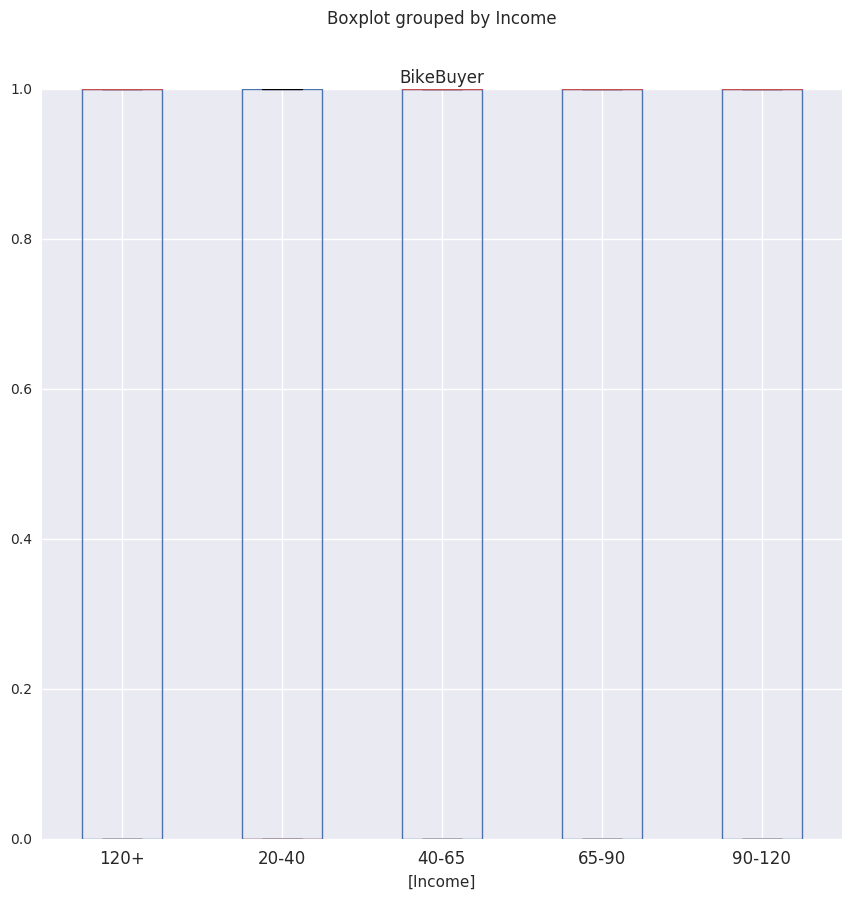

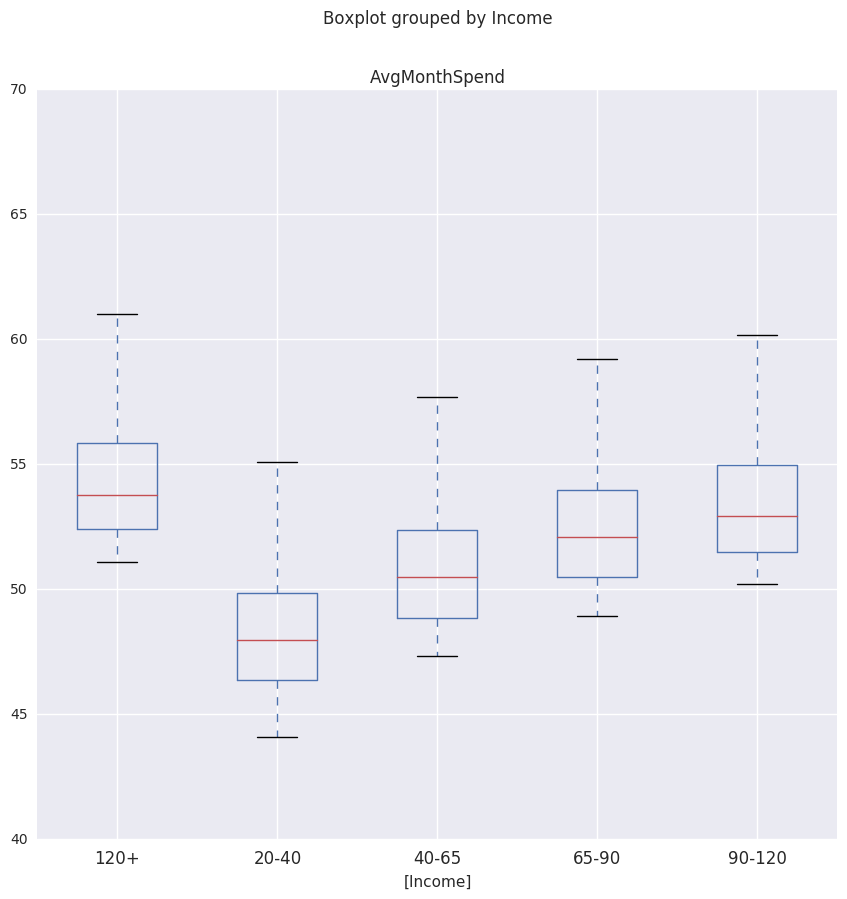

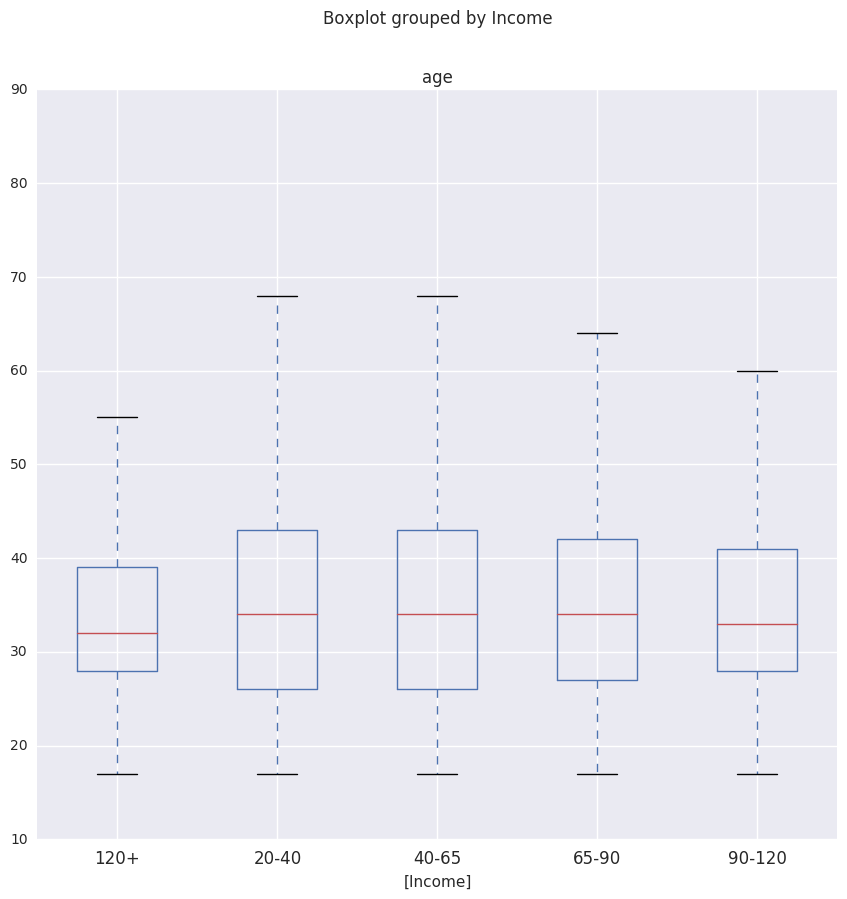

In [26]:
## Plot categorical variables as box plots
def income_boxplot(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):                  
            fig = plt.figure(figsize = (10,10))
            fig.clf()
            ax = fig.gca() 
            df.boxplot(column = [col], ax = ax, by = ['Income'])          
    return('Done') 

income_boxplot(frame)